# PetFinder.my Adoption Prediction

## Dataset introduction

This project focuses on analyzing the features in the train and test datasets to understand their relationship with pet adoption speeds.

Since 2008, PetFinder.my has been Malaysia’s leading animal welfare platform, hosting a database of over 150,000 animals. The platform collaborates with animal enthusiasts, media outlets, corporations, and international organizations to advance animal welfare.

This competition challenges participants to develop algorithms that predict pet adoptability—specifically, how quickly pets are adopted. Successful algorithms may be adapted into AI tools to help shelters and rescuers worldwide enhance pet profiles, reduce animal suffering, and minimize euthanasia.

**File descriptions**
- train.csv - Tabular/text data for the training set
- test.csv - Tabular/text data for the test set
- breed_labels.csv - Contains Type, and BreedName for each BreedID. Type 1 is dog, 2 is cat.
- color_labels.csv - Contains ColorName for each ColorID

**Data Fields**
- PetID - Unique hash ID of pet profile
- AdoptionSpeed - Categorical speed of adoption. Lower is faster. This is the value to predict. See below section for more info.
- Type - Type of animal (1 = Dog, 2 = Cat)
- Name - Name of pet (Empty if not named)
- Age - Age of pet when listed, in months
- Breed1 - Primary breed of pet (Refer to BreedLabels dictionary)
- Breed2 - Secondary breed of pet, if pet is of mixed breed (Refer to BreedLabels dictionary)
- Gender - Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)
- Color1 - Color 1 of pet (Refer to ColorLabels dictionary)
- Color2 - Color 2 of pet (Refer to ColorLabels dictionary)
- Color3 - Color 3 of pet (Refer to ColorLabels dictionary)
- MaturitySize - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)
- FurLength - Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)
- Vaccinated - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)
- Dewormed - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)
- Sterilized - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)
- Health - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)
- Quantity - Number of pets represented in profile
- Fee - Adoption fee (0 = Free)
- State - State location in Malaysia (Refer to StateLabels dictionary)
- RescuerID - Unique hash ID of rescuer
- VideoAmt - Total uploaded videos for this pet
- PhotoAmt - Total uploaded photos for this pet
- Description - Profile write-up for this pet. The primary language used is English, with some in Malay or Chinese.

**Import libraries**

In [637]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Import dataset**

In [638]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
breed_labels = pd.read_csv("breed_labels.csv")
color_labels = pd.read_csv("color_labels.csv")

## Exploratory data analysis (EDA)

### 1. Data overview: understanding the dataset

In [639]:
# Visualize the first rows of the data set
train_data.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [640]:
# Number of rows and columns
train_data.shape

(14993, 24)

In [641]:
# Get information about the data set
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13728 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  int64  
 18  Rescue

The dataset has 14.993 rows and 24 columns. Column "Name" has only 13.728 which indicates that has some null-values. It doesn't seem a relevant volume, but it's a factor that could affect the adoption speed. We'll look into it later.

In [642]:
# Types of data
train_data.dtypes

Type               int64
Name              object
Age                int64
Breed1             int64
Breed2             int64
Gender             int64
Color1             int64
Color2             int64
Color3             int64
MaturitySize       int64
FurLength          int64
Vaccinated         int64
Dewormed           int64
Sterilized         int64
Health             int64
Quantity           int64
Fee                int64
State              int64
RescuerID         object
VideoAmt           int64
Description       object
PetID             object
PhotoAmt         float64
AdoptionSpeed      int64
dtype: object

In [643]:
# Describe the data
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Type,14993.0,1.457614,0.498217,1.0,1.0,1.0,2.0,2.0
Age,14993.0,10.452078,18.155790,0.0,2.0,3.0,12.0,255.0
Breed1,14993.0,265.272594,60.056818,0.0,265.0,266.0,307.0,307.0
Breed2,14993.0,74.009738,123.011575,0.0,0.0,0.0,179.0,307.0
Gender,14993.0,1.776162,0.681592,1.0,1.0,2.0,2.0,3.0
Color1,14993.0,2.234176,1.745225,1.0,1.0,2.0,3.0,7.0
Color2,14993.0,3.222837,2.742562,0.0,0.0,2.0,6.0,7.0
Color3,14993.0,1.882012,2.984086,0.0,0.0,0.0,5.0,7.0
MaturitySize,14993.0,1.862002,0.547959,1.0,2.0,2.0,2.0,4.0
FurLength,14993.0,1.467485,0.599070,1.0,1.0,1.0,2.0,3.0


In [644]:
# Unique values
train_data.nunique()

Type                 2
Name              9059
Age                106
Breed1             176
Breed2             135
Gender               3
Color1               7
Color2               7
Color3               6
MaturitySize         4
FurLength            3
Vaccinated           3
Dewormed             3
Sterilized           3
Health               3
Quantity            19
Fee                 74
State               14
RescuerID         5595
VideoAmt             9
Description      14031
PetID            14993
PhotoAmt            31
AdoptionSpeed        5
dtype: int64

In [645]:
# Let's make sure the test dataset has the same information
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3972 entries, 0 to 3971
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Type          3972 non-null   int64  
 1   Name          3558 non-null   object 
 2   Age           3972 non-null   int64  
 3   Breed1        3972 non-null   int64  
 4   Breed2        3972 non-null   int64  
 5   Gender        3972 non-null   int64  
 6   Color1        3972 non-null   int64  
 7   Color2        3972 non-null   int64  
 8   Color3        3972 non-null   int64  
 9   MaturitySize  3972 non-null   int64  
 10  FurLength     3972 non-null   int64  
 11  Vaccinated    3972 non-null   int64  
 12  Dewormed      3972 non-null   int64  
 13  Sterilized    3972 non-null   int64  
 14  Health        3972 non-null   int64  
 15  Quantity      3972 non-null   int64  
 16  Fee           3972 non-null   int64  
 17  State         3972 non-null   int64  
 18  RescuerID     3972 non-null 

The test dataset has the same columns with 3972 entries to test, except for the target variable which has to be predicted with the model.

### 2. Data cleaning
It seems we have some null values in the dataset, let's solve the issue before going deeper into the analysis

In [646]:
# Confirm null values with isnull for the train dataset
train_data.isnull().sum()

Type                0
Name             1265
Age                 0
Breed1              0
Breed2              0
Gender              0
Color1              0
Color2              0
Color3              0
MaturitySize        0
FurLength           0
Vaccinated          0
Dewormed            0
Sterilized          0
Health              0
Quantity            0
Fee                 0
State               0
RescuerID           0
VideoAmt            0
Description        13
PetID               0
PhotoAmt            0
AdoptionSpeed       0
dtype: int64

In [647]:
# Confirm null values with isnull for the test dataset
test_data.isnull().sum()

Type              0
Name            414
Age               0
Breed1            0
Breed2            0
Gender            0
Color1            0
Color2            0
Color3            0
MaturitySize      0
FurLength         0
Vaccinated        0
Dewormed          0
Sterilized        0
Health            0
Quantity          0
Fee               0
State             0
RescuerID         0
VideoAmt          0
Description       1
PetID             0
PhotoAmt          0
dtype: int64

In [648]:
# Replace na values in train and test name column with "No name"
train_data["Name"] = train_data["Name"].fillna("No name")
test_data["Name"] = test_data["Name"].fillna("No name")

train_data["Description"] = train_data["Description"].fillna("No description")
test_data["Description"] = test_data["Description"].fillna("No description")

In [649]:
# Confirm no null values with isnull for the train dataset
train_data.isnull().sum()

Type             0
Name             0
Age              0
Breed1           0
Breed2           0
Gender           0
Color1           0
Color2           0
Color3           0
MaturitySize     0
FurLength        0
Vaccinated       0
Dewormed         0
Sterilized       0
Health           0
Quantity         0
Fee              0
State            0
RescuerID        0
VideoAmt         0
Description      0
PetID            0
PhotoAmt         0
AdoptionSpeed    0
dtype: int64

In [650]:
# Confirm no null values with isnull for the test dataset
test_data.isnull().sum()

Type            0
Name            0
Age             0
Breed1          0
Breed2          0
Gender          0
Color1          0
Color2          0
Color3          0
MaturitySize    0
FurLength       0
Vaccinated      0
Dewormed        0
Sterilized      0
Health          0
Quantity        0
Fee             0
State           0
RescuerID       0
VideoAmt        0
Description     0
PetID           0
PhotoAmt        0
dtype: int64

In [651]:
# Create a "No name" column indicator

train_data["HasName"] = [0 if x=="No name" else 1 for x in train_data["Name"]]
test_data["HasName"] = [0 if x=="No name" else 1 for x in test_data["Name"]]

# Length of description
train_data["Desc_length"] = (train_data["Description"].str.len())
test_data["Desc_length"] = (test_data["Description"].str.len())

# Create a "Pure Breed" column indicator
# We can identify dogs as breed = 307
train_data["PureBreed"] = [0 if x==307 else 1 for x in train_data["Breed1"]]
test_data["PureBreed"] = [0 if x==307 else 1 for x in test_data["Breed1"]]

train_data["PureBreed"] = [0 if x==307 else 1 for x in train_data["Breed2"]]
test_data["PureBreed"] = [0 if x==307 else 1 for x in test_data["Breed2"]]

# We can identify mixed breed cats because breed1 != breed2
train_data["PureBreed"] = [1 if breed1 == breed2 else 0 for breed1, breed2 in zip(train_data["Breed1"], train_data["Breed2"])]
test_data["PureBreed"] = [1 if breed1 == breed2 else 0 for breed1, breed2 in zip(test_data["Breed1"], test_data["Breed2"])]

print(train_data["HasName"].value_counts())
print(test_data["HasName"].value_counts())
print(train_data["Desc_length"].value_counts())
print(test_data["Desc_length"].value_counts())
print(train_data["PureBreed"].value_counts())
print(test_data["PureBreed"].value_counts())

HasName
1    13728
0     1265
Name: count, dtype: int64
HasName
1    3558
0     414
Name: count, dtype: int64
Desc_length
12      207
14       88
122      65
16       63
88       59
       ... 
1376      1
1227      1
1723      1
2119      1
1447      1
Name: count, Length: 1478, dtype: int64
Desc_length
104     33
83      29
8       27
26      22
46      21
        ..
654      1
1195     1
1158     1
893      1
1119     1
Name: count, Length: 945, dtype: int64
PureBreed
0    13483
1     1510
Name: count, dtype: int64
PureBreed
0    3634
1     338
Name: count, dtype: int64


### 3. Relationships and Patterns

Let's dig deeper into the data to identify patterns and correlations with the target variable. We want to answer the following questions:
- What variables are related with the target?
- How is this relationship? 
- Can we find any pattern in the data that gives us initial clues for our future model? 
- What are the distribution of key variables?

#### Data distribution

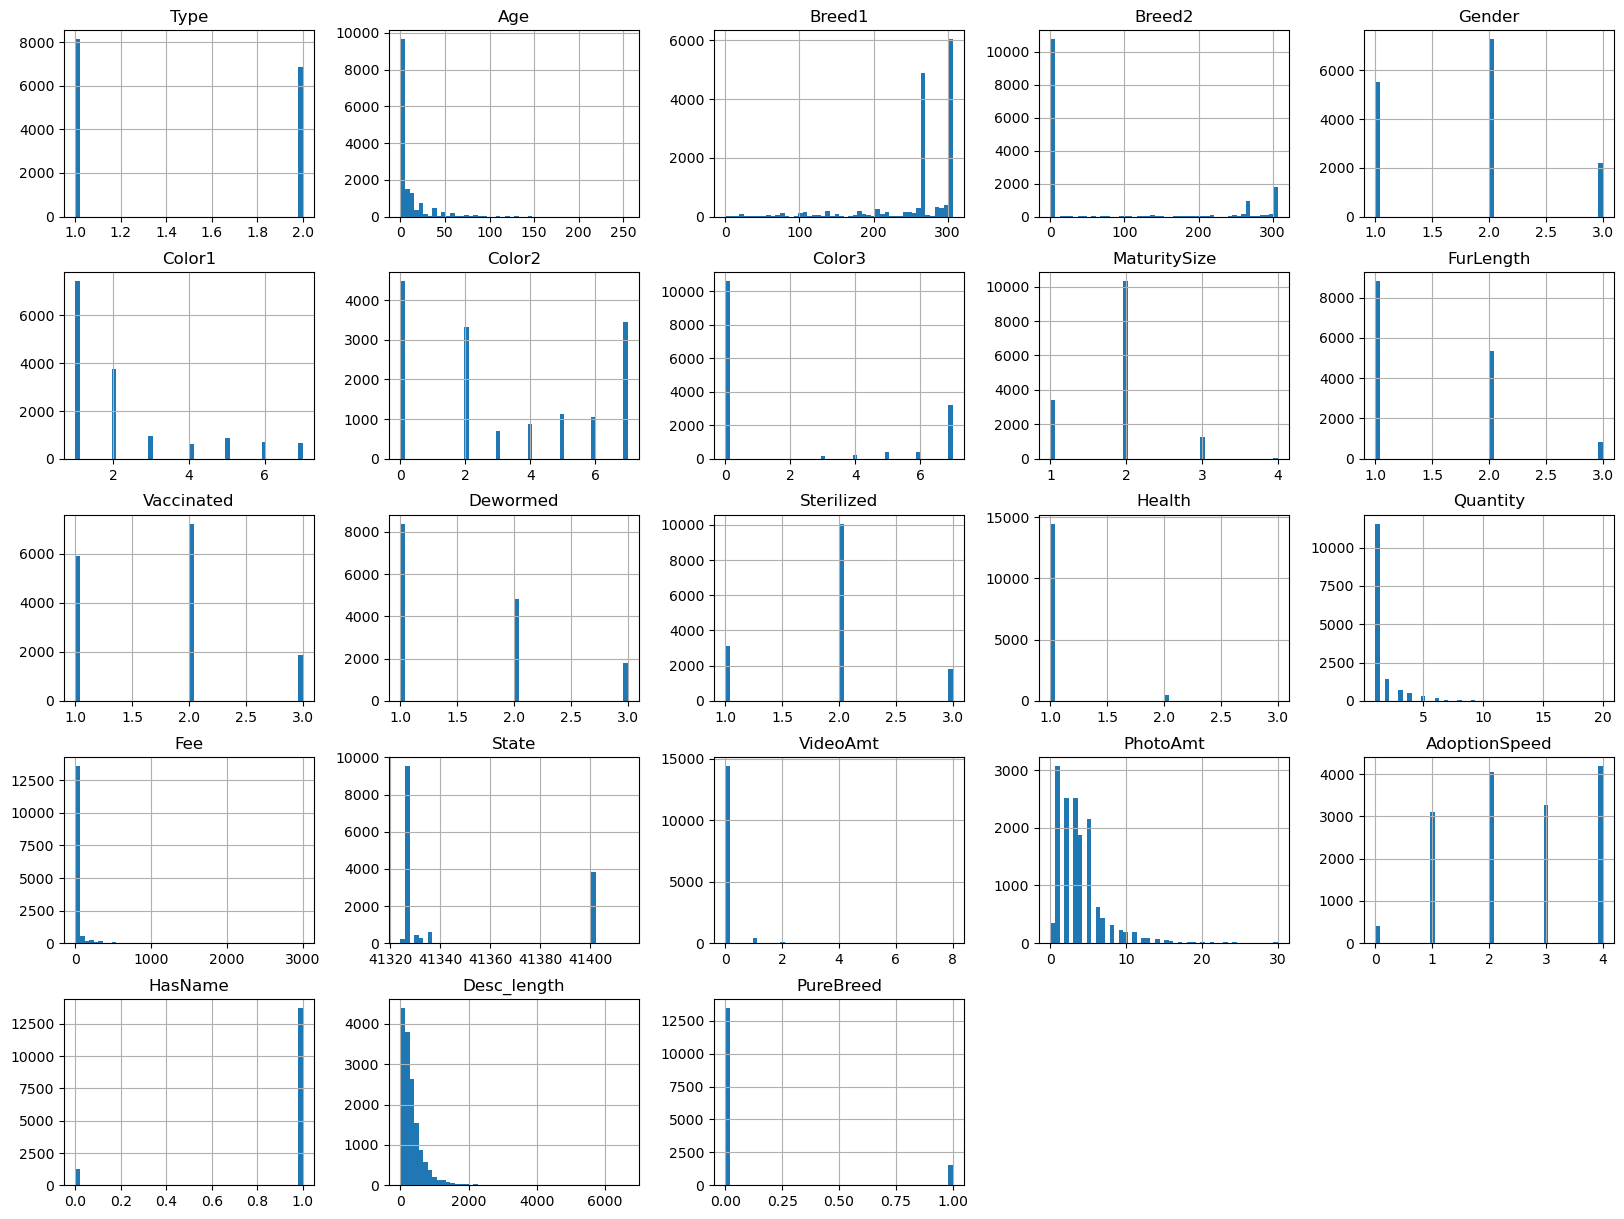

In [652]:
# Plot the data for the train data

train_data.hist(bins = 50, figsize=(20,15))
plt.show()

- **Type**: Categorical variable with two main categories (1 = Dog, 2 = Cat). Dog is significantly more frequent than cat.

- **Age**: The age distribution is heavily right-skewed, indicating most entries represent younger animals, with only a few older ones.

- **Breed1 and Breed2**: These features are dominated by specific categories, with some breeds occurring far more frequently than others.

- **Gender**: There are distinct categories (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets), but female appears more frequently than male and mixed, indicating an imbalance in the data.

- **Color1, Color2, and Color3**: These show a categorical distribution with certain colors being more common, especially in Color1, while others are rare or nonexistent.

- **MaturitySize**: A categorical variable, where medium dominates the dataset.

- **FurLength**: This shows that most animals have a short and medium fur length, with other lengths being less common.

- **Vaccinated and Sterilized**: These categorical variables indicate most animals fall into "no" category, with fewer in the others.

- **Dewarmed**: This categorical variable indicates most animals fall into "yes" category, with fewer in the others.

- **Health**: The vast majority fall into healthy category, suggesting most animals are healthy.

- **Quantity**: This numeric feature is right-skewed, with most values being low (likely representing single animals), but a few higher values exist.

- **Fee**: The distribution is heavily skewed toward lower fees, with most entries likely having no or minimal fees.

- **State**: Certain states dominate, indicating an imbalance in data collection across locations.

- **VideoAmt and PhotoAmt**: These show numeric distributions. Most animals have a small number of photos or videos, with only a few having larger amounts.

- **AdoptionSpeed**: This categorical target variable has distinct classes. Some speeds are more frequent than others, potentially indicating biases in adoption rates.

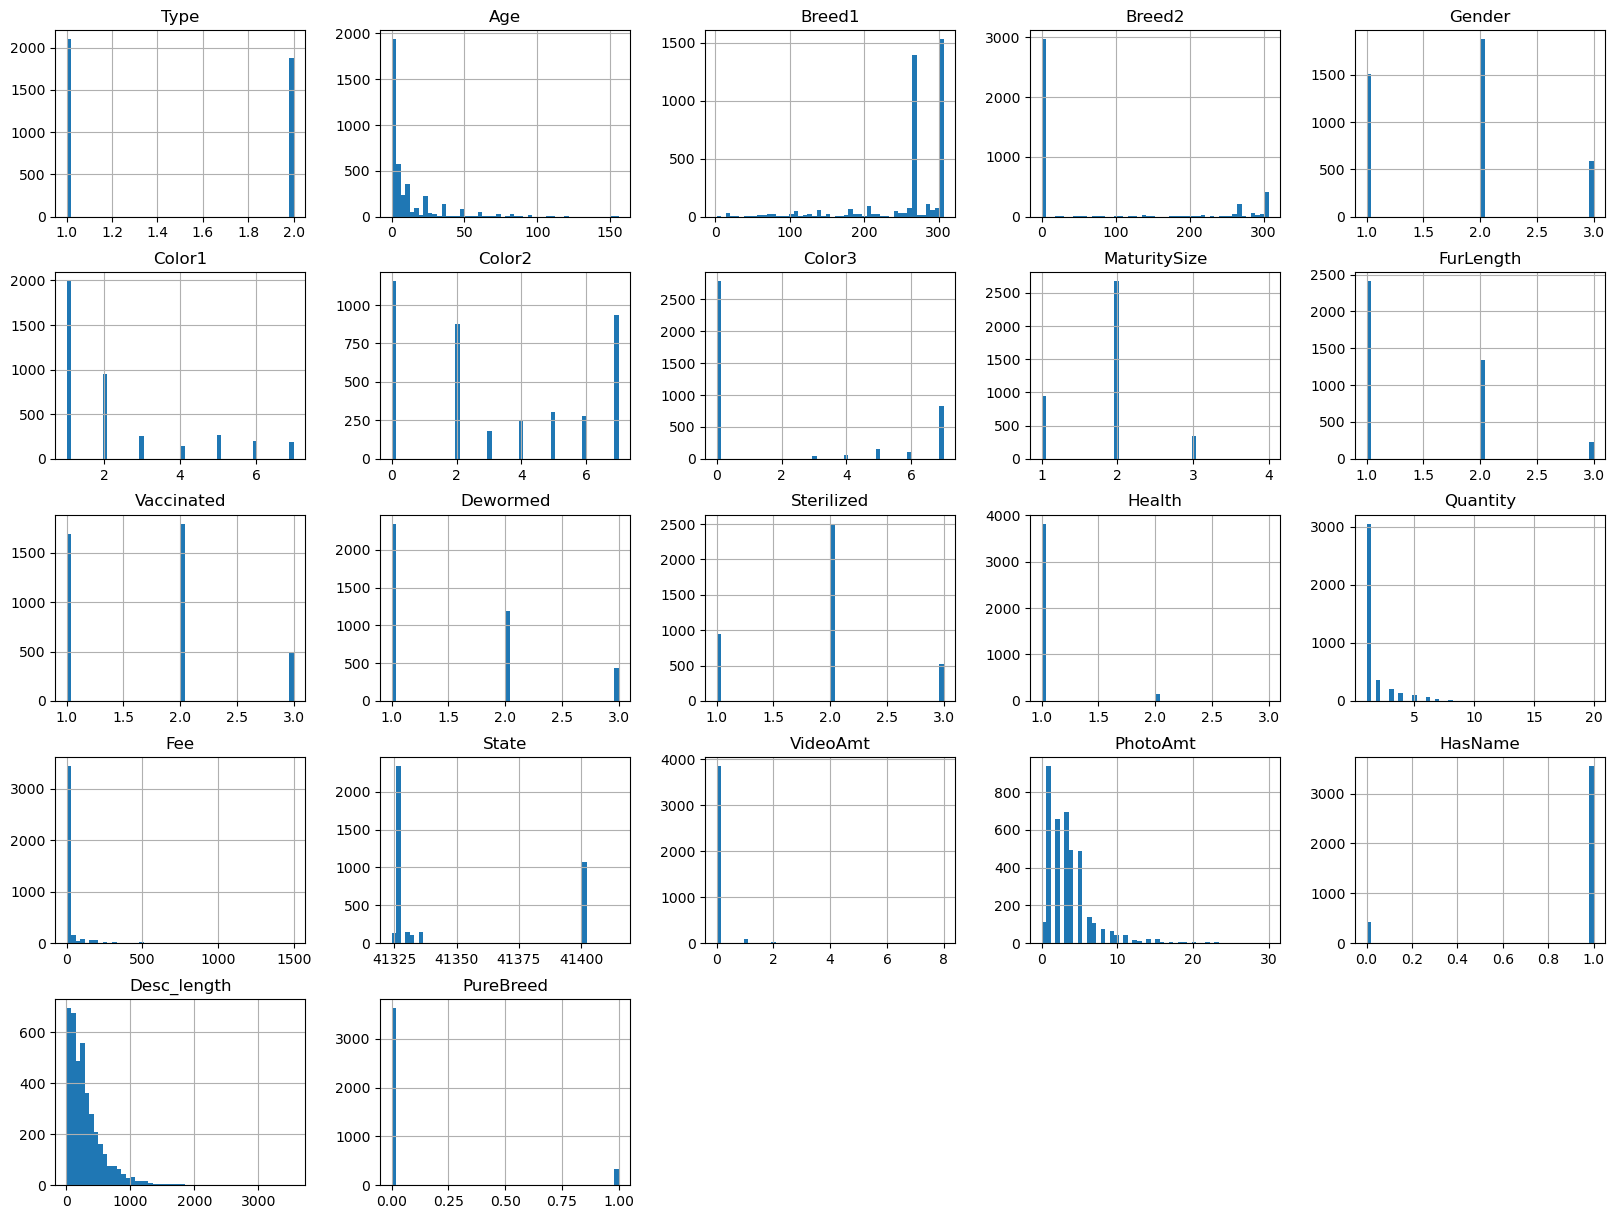

In [653]:
# Plot the data for the test data

test_data.hist(bins = 50, figsize=(20,15))
plt.show()

- **Type**: Categorical variable with two main categories (1 = Dog, 2 = Cat). Cats is significantly more frequent than dogs.

- **Age**: The age distribution is heavily right-skewed, indicating most entries represent younger animals, with only a few older ones.

- **Breed1 and Breed2**: These features are dominated by specific categories, with some breeds occurring far more frequently than others.

- **Gender**: There are distinct categories (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets), but male appears more frequently than female and mixed, indicating an imbalance in the data.

- **Color1, Color2, and Color3**: These show a categorical distribution with certain colors being more common, especially in Color1, while others are rare or nonexistent.

- **MaturitySize**: A categorical variable, where medium dominates the dataset.

- **FurLength**: This shows that most animals have a short and medium fur length, with other lengths being less common.

- **Vaccinated and Sterilized**: These categorical variables indicate most animals fall into "no" category, with fewer in the others.

- **Dewarmed**: This categorical variable indicates most animals fall into "yes" category, with fewer in the others.

- **Health**: The vast majority fall into healthy category, suggesting most animals are healthy.

- **Quantity**: This numeric feature is right-skewed, with most values being low (likely representing single animals), but a few higher values exist.

- **Fee**: The distribution is heavily skewed toward lower fees, with most entries likely having no or minimal fees.

- **State**: Certain states dominate, indicating an imbalance in data collection across locations.

- **VideoAmt and PhotoAmt**: These show numeric distributions. Most animals have a small number of photos or videos, with only a few having larger amounts.

- **AdoptionSpeed**: This categorical target variable has distinct classes. Some speeds are more frequent than others, potentially indicating biases in adoption rates.

**Some considerations to take into account:**
1. Distribution Mismatch: 
Distributions for some features (e.g., Type, Breed1, Fee, Quantity, or State) could differ between train and test datasets. For example, if Type shows a higher proportion of cats in the test set compared to the training set, this could skew the predictions.
Differences in the Fee or PhotoAmt distributions might cause the model to learn patterns that don't apply well to the test set.

2. Feature Representation Issues:
Categorical variables like Breed1, State, and Color1 may have categories in the test set that are underrepresented or missing in the training set. This leads to issues when encoding these features (e.g., One-Hot Encoding or Label Encoding).
AdoptionSpeed, being categorical, could suffer from this mismatch if the train data doesn't sufficiently represent all classes.

3.Skewed Numeric Variables:
Numeric features like Age, Fee, and PhotoAmt are right-skewed in both datasets. If the train and test data have different degrees of skewness, it might result in poor predictions unless transformations (e.g., log transformations) are applied.

**Modeling approach**
- Handle Imbalances
- Normalize or log-transform numeric variables (e.g., Age, Fee, PhotoAmt) to reduce skewness.
- Ensure consistent encoding of categorical features across train and test data. Use strategies like target encoding or frequency encoding for high-cardinality features like Breed1 or State.
- Tree-based models (e.g., Random Forest, XGBoost, LightGBM, or CatBoost) are excellent for handling categorical features and missing data effectively.

#### Correlation between variables

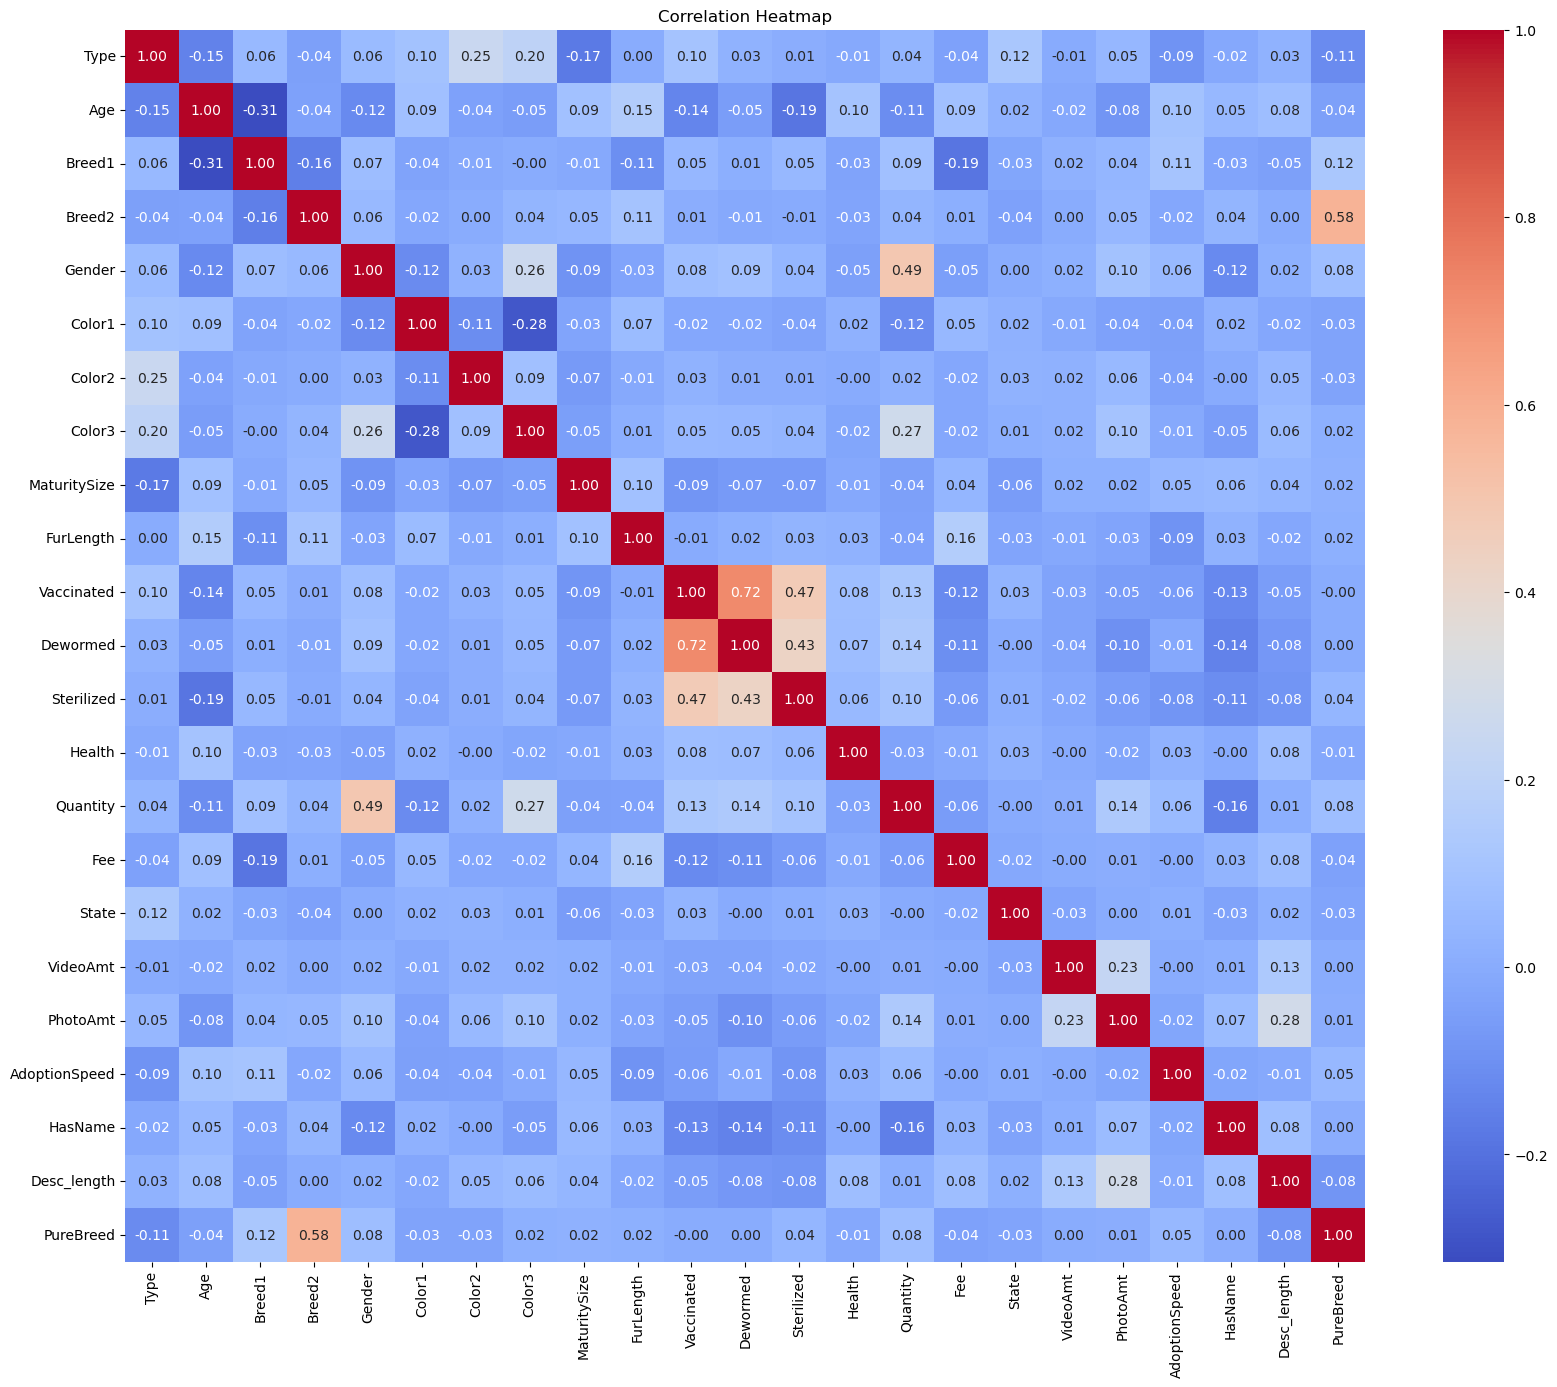

In [654]:
# Select numeric columns for the correlation
train_num = train_data.select_dtypes(include=np.number)
test_num = test_data.select_dtypes(include=np.number)

# Correlations between variables
corr_matrix = train_num.corr()

# Correlation heatmap

plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



**Some key takeaways from the heatmap:**

**Strong Positive Correlations** (Close to 1)

**Vaccinated, Dewormed, and Sterilized:** These variables have a high positive correlation with each other (e.g., Vaccinated ↔ Dewormed and Dewormed ↔ Sterilized). This indicates that pets that are vaccinated are more likely to be dewormed and sterilized. This relationship may arise from better overall care for some pets.

**PhotoAmt and VideoAmt:** A moderate positive correlation exists between the number of photos and videos. Pets with more photos tend to have more videos, which could indicate better presentation efforts.


**Strong Negative Correlations** (Close to -1)

**Fur Length ↔ AdoptionSpeed:** There is a moderate negative correlation between Fur Length and AdoptionSpeed.

**Type ↔ AdoptionSpeed:** A weak negative correlation indicates that some type of animals could have a better chance to be adopted

**Sterilized ↔ AdoptionSpeed:** Pets sterilized show a weak negative correlation with slower adoption speeds. This could mean sterilized pets are adopted slightly faster.


**Low Correlations** (Close to 0)

**AdoptionSpeed ↔ Fee:** There’s a weak correlation between the fee and its adoption speed. Having to pay a fee may have little to no direct influence on the adoption speed. Maybe because of the low fees we see in the dataset.

**State ↔ AdoptionSpeed:** The location (state) does not strongly influence adoption speed in this dataset, suggesting no clear geographic bias in adoption trends.

**PhotoAmt ↔ AdoptionSpeed:** The correlation between the number of photos and adoption speed is weak, suggesting that adding more photos doesn’t significantly influence how quickly pets are adopted.

**Insights for Predictive Modeling**
- Features like **Age, Breed1, and Gender** appear to have a **stronger relationship with AdoptionSpeed**, making them potentially important for predictive modeling.
- Variables like **State, HasName, and Fee** show **weaker correlations with AdoptionSpeed**, so their impact might be minimal unless combined with other features.
- Relationships among **Vaccinated, Dewormed, and Sterilized suggest potential collinearity**, which should be accounted for to avoid redundancy in models.


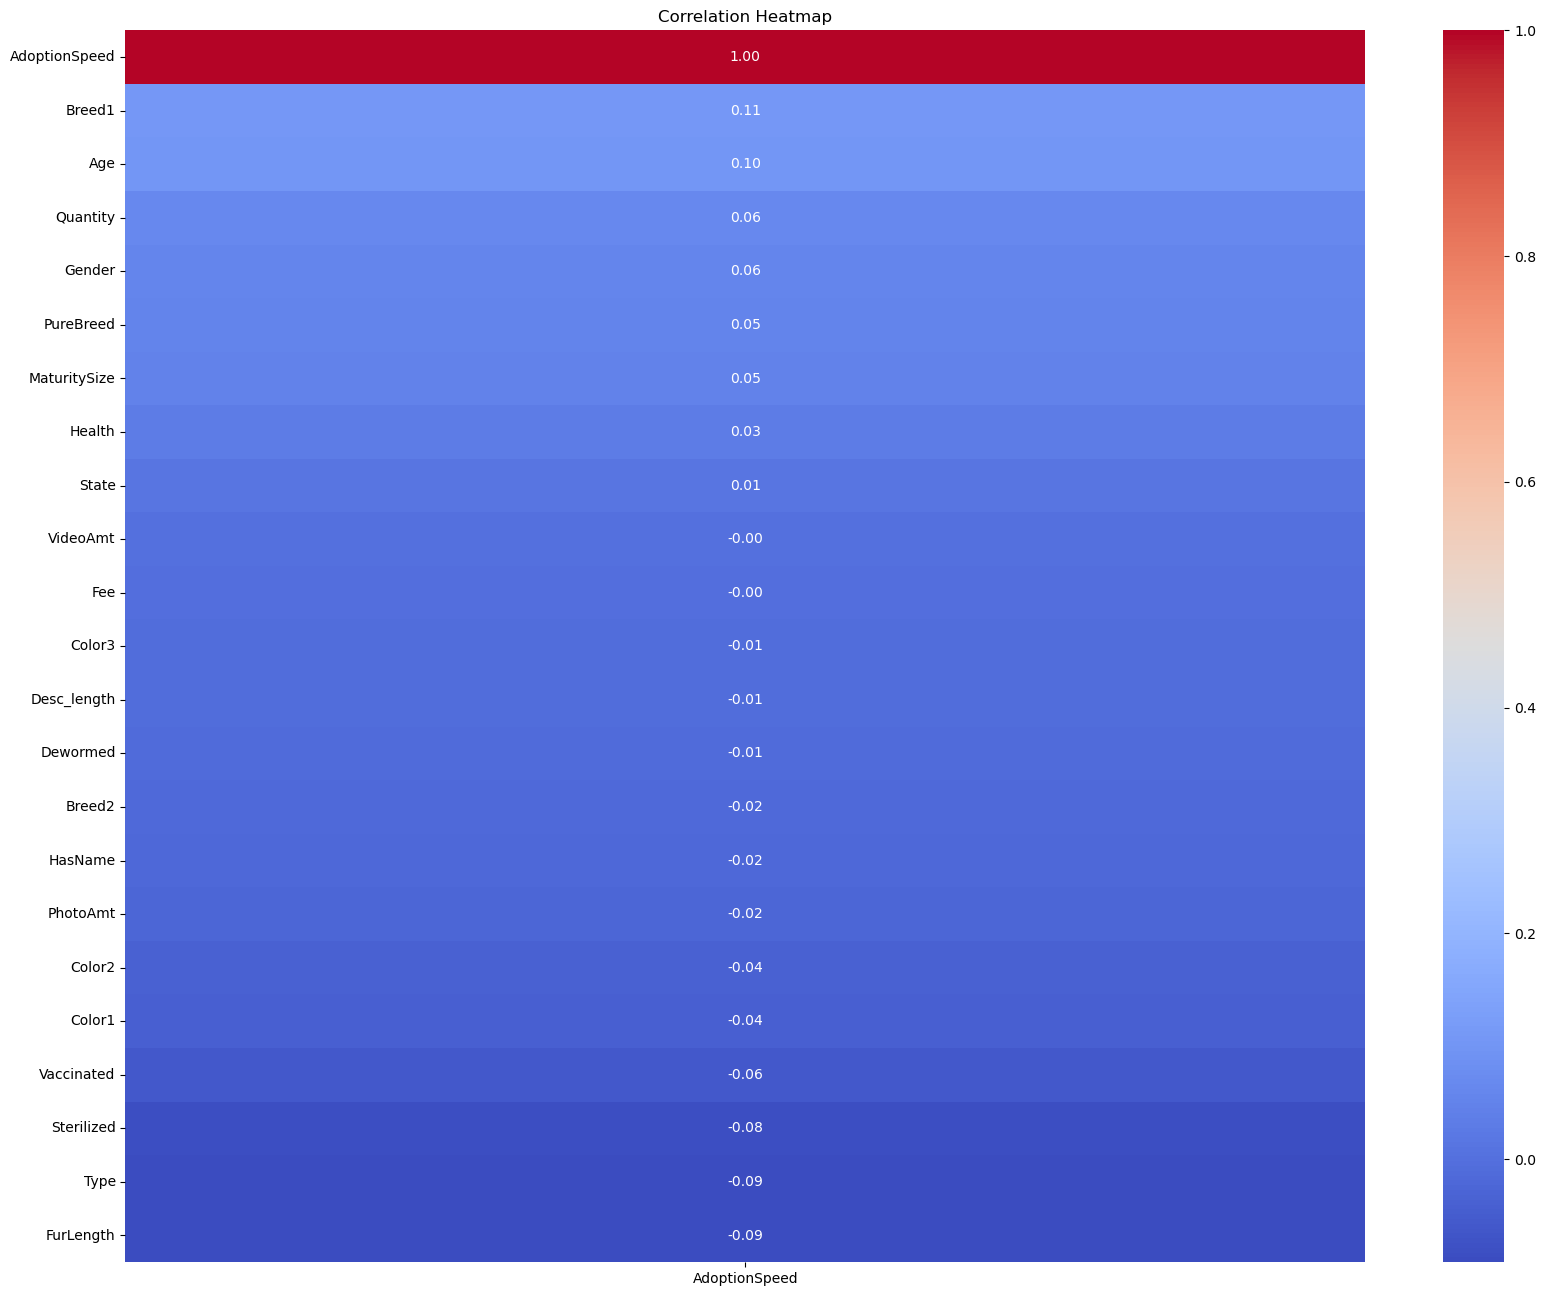

In [655]:
# Correlation with the target column
corr_adoptionspeed = train_num.corr()[["AdoptionSpeed"]].sort_values(by="AdoptionSpeed", ascending=False)

plt.figure(figsize=(20, 16))
sns.heatmap(corr_adoptionspeed, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

We have a weak correlation between the variables and adoption speed, which indicates that we need to dig deeper and use other techniques to further understand the data set.

#### Data visualization

**1. Target: Adoption Speed**

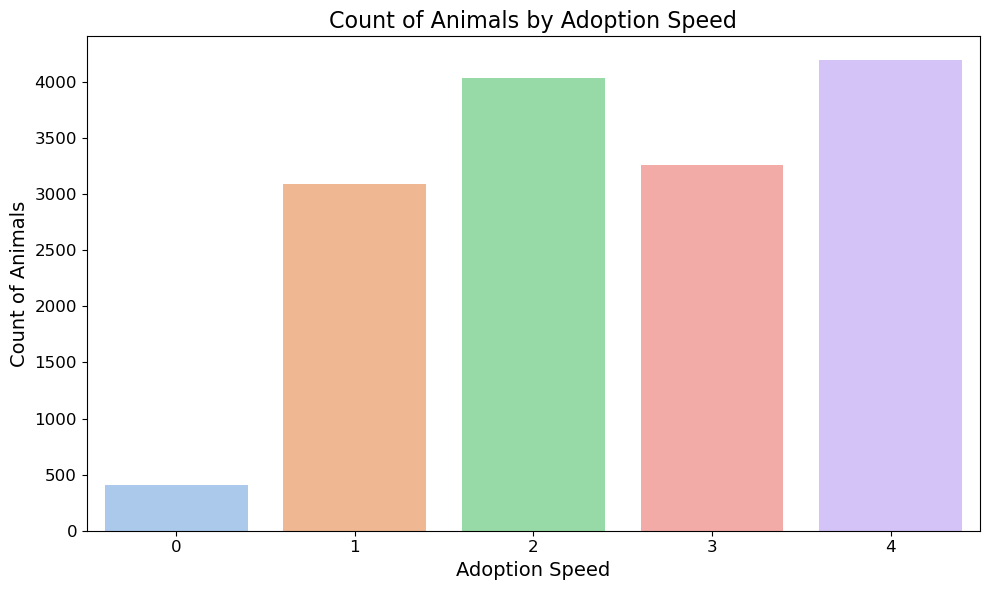

In [656]:
# Bar plot for Adoption Speed
plt.figure(figsize=(10, 6))
sns.countplot(x='AdoptionSpeed', data=train_data, hue='AdoptionSpeed', palette='pastel', legend=False)

# Add labels and title
plt.title('Count of Animals by Adoption Speed', fontsize=16)
plt.xlabel('Adoption Speed', fontsize=14)
plt.ylabel('Count of Animals', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


**2. Adoption Speed by Type**

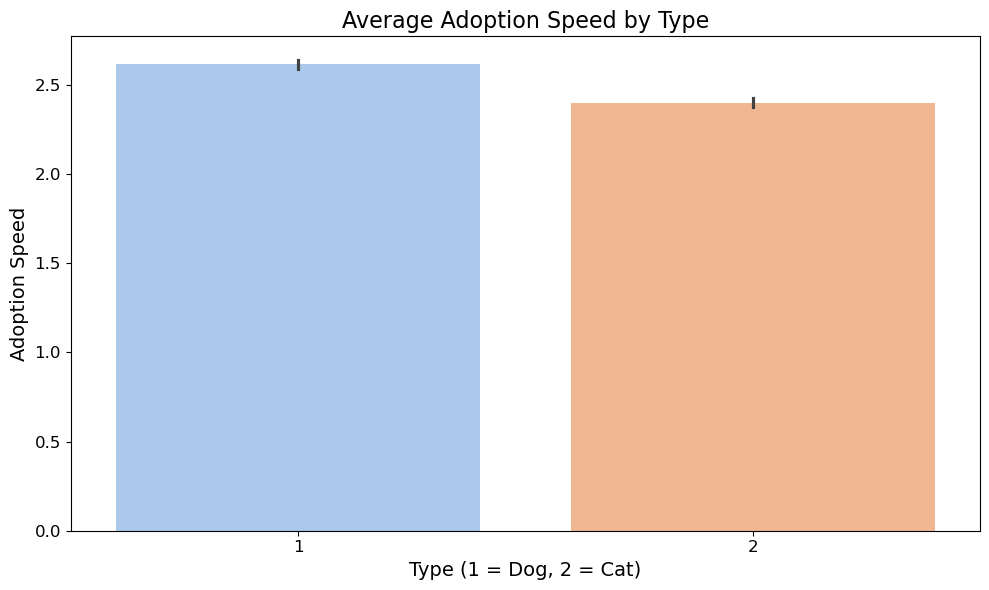

In [710]:
# Bar plot for Adoption Speed by Type
plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y="AdoptionSpeed", data=train_data, hue="Type", palette='pastel', legend=False)

# Add labels and title
plt.title('Average Adoption Speed by Type', fontsize=16)
plt.xlabel('Type (1 = Dog, 2 = Cat)', fontsize=14)
plt.ylabel('Adoption Speed', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

**3. Breed and Adoption Speed**

In [658]:
# Number of unique breeds by adoption speed
train_data.groupby("AdoptionSpeed")["Breed1"].nunique() #too many unique breeds to visualize all of them

# Let's see what breeds are the fastest adopted and the ones more common not to be adopted
# Filter train_data for AdoptionSpeed = 0 and AdoptionSpeed = 4
adopt_speed_0 = train_data[train_data["AdoptionSpeed"] == 0]
adopt_speed_4 = train_data[train_data["AdoptionSpeed"] == 4]

# Group by Breed1 and count occurrences for AdoptionSpeed 0
breed_count_0 = adopt_speed_0.groupby("Breed1").size().reset_index(name='count')
breed_count_0 = breed_count_0.sort_values(by="count", ascending=False)

# Group by Breed1 and count occurrences for AdoptionSpeed 4
breed_count_4 = adopt_speed_4.groupby("Breed1").size().reset_index(name='count')
breed_count_4 = breed_count_4.sort_values(by="count", ascending=False)

# Merge breed_count_0 with brand_labels to get breed names for AdoptionSpeed 0
breed_count_0 = breed_count_0.merge(breed_labels, left_on='Breed1', right_on='BreedID', how='left')

# Merge breed_count_4 with brand_labels to get breed names for AdoptionSpeed 4
breed_count_4 = breed_count_4.merge(breed_labels, left_on='Breed1', right_on='BreedID', how='left')

# Display top breeds for AdoptionSpeed 0 and 4
print("Top breeds with AdoptionSpeed 0:")
print(breed_count_0.head())

print("Top breeds with AdoptionSpeed 4:")
print(breed_count_4.head())

Top breeds with AdoptionSpeed 0:
   Breed1  count  BreedID  Type             BreedName
0     266     92      266     2   Domestic Short Hair
1     307     81      307     1           Mixed Breed
2     265     45      265     2  Domestic Medium Hair
3     285     20      285     2               Persian
4     292     18      292     2               Siamese
Top breeds with AdoptionSpeed 4:
   Breed1  count  BreedID  Type             BreedName
0     307   2031    307.0   1.0           Mixed Breed
1     266    976    266.0   2.0   Domestic Short Hair
2     265    312    265.0   2.0  Domestic Medium Hair
3     299     91    299.0   2.0                 Tabby
4     264     52    264.0   2.0    Domestic Long Hair


In [659]:
# We could think Pure Breed could be adopted faster, let's see

# Create a "Pure Breed" column indicator
# We can identify dogs as breed = 307
train_data["PureBreed"] = [0 if x==307 else 1 for x in train_data["Breed1"]]
test_data["PureBreed"] = [0 if x==307 else 1 for x in test_data["Breed1"]]

train_data["PureBreed"] = [0 if x==307 else 1 for x in train_data["Breed2"]]
test_data["PureBreed"] = [0 if x==307 else 1 for x in test_data["Breed2"]]

# We can identify mixed breed cats because breed1 != breed2
train_data["PureBreed"] = [1 if breed1 == breed2 else 0 for breed1, breed2 in zip(train_data["Breed1"], train_data["Breed2"])]
test_data["PureBreed"] = [1 if breed1 == breed2 else 0 for breed1, breed2 in zip(test_data["Breed1"], test_data["Breed2"])]


print(train_data["PureBreed"].value_counts())
print(test_data["PureBreed"].value_counts())

PureBreed
0    13483
1     1510
Name: count, dtype: int64
PureBreed
0    3634
1     338
Name: count, dtype: int64


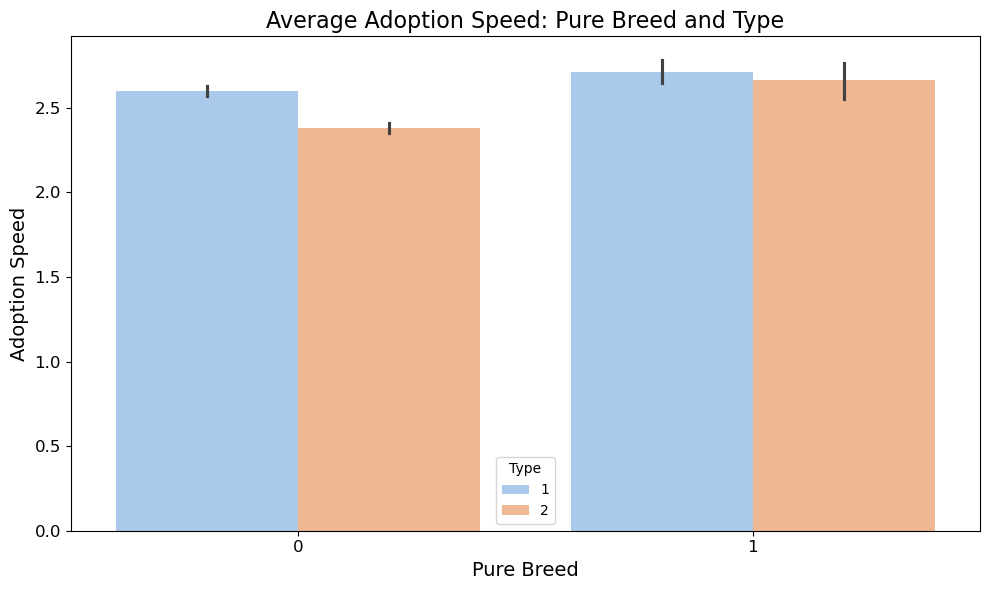

In [711]:
# We could think Pure Breed animals get adopted faster, let's see.
# Bar plot for Adoption Speed and Pure Breed
plt.figure(figsize=(10, 6))
sns.barplot(x='PureBreed', y="AdoptionSpeed", data=train_data, hue="Type", palette='pastel', legend=True)

# Add labels and title
plt.title('Average Adoption Speed: Pure Breed and Type', fontsize=16)
plt.xlabel('Pure Breed', fontsize=14)
plt.ylabel('Adoption Speed', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

It doesn't seem like there's a significant difference between Mixed Breeds and Pure Breeds. But the sample has a largest number of Pure Breeds which could affect our results. We'll need other models.

**4. Age and Adoption Speed**

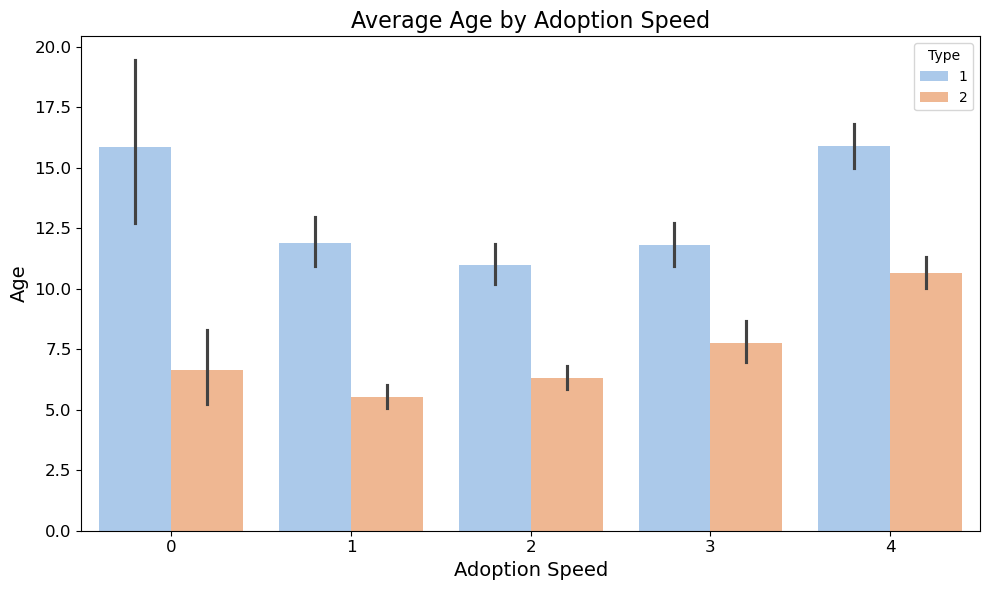

In [714]:
# Bar plot for Adoption Speed by Age
plt.figure(figsize=(10, 6))
sns.barplot(x='AdoptionSpeed', y="Age", data=train_data, hue="Type", palette='pastel', legend=True)

# Add labels and title
plt.title('Average Age by Adoption Speed', fontsize=16)
plt.xlabel('Adoption Speed', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

**5. Gender and Adoption Speed**

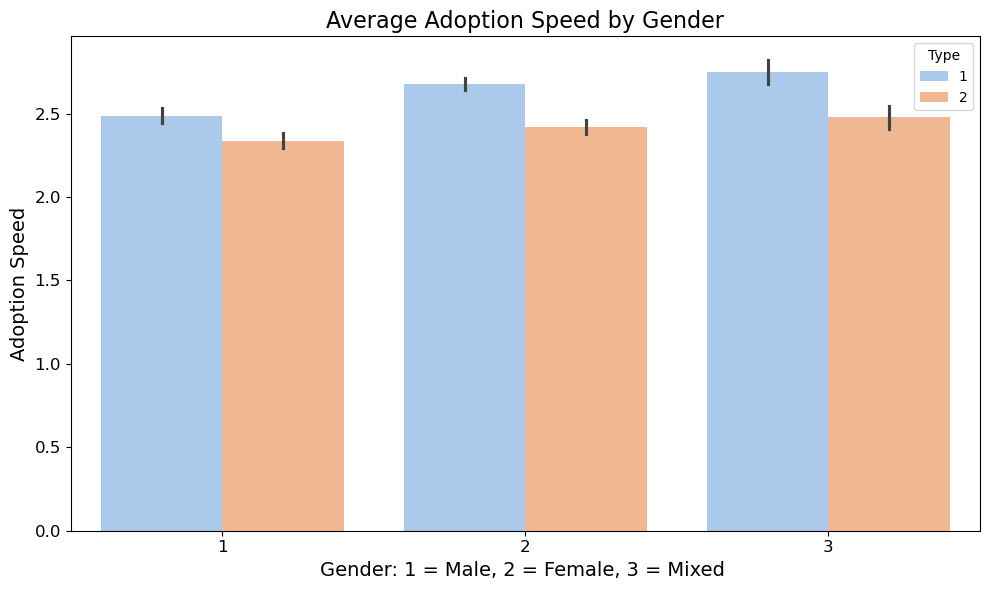

In [713]:
# Bar plot for Adoption Speed by Age
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y="AdoptionSpeed", data=train_data, hue="Type", palette='pastel', legend=True)

# Add labels and title
plt.title('Average Adoption Speed by Gender', fontsize=16)
plt.xlabel('Gender: 1 = Male, 2 = Female, 3 = Mixed ', fontsize=14)
plt.ylabel('Adoption Speed', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

**6. Fur Length and Adoption Speed**

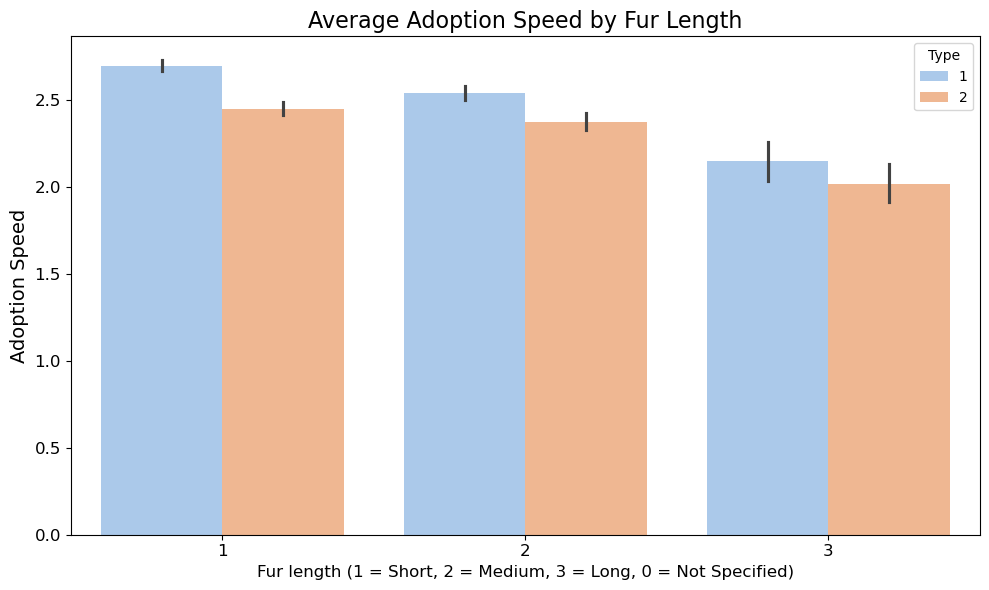

In [715]:
# Bar plot for Adoption Speed by Fur Length
plt.figure(figsize=(10, 6))
sns.barplot(x='FurLength', y="AdoptionSpeed", data=train_data, hue="Type", palette='pastel', legend=True)

# Add labels and title
plt.title('Average Adoption Speed by Fur Length', fontsize=16)
plt.xlabel('Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)', fontsize=12)
plt.ylabel('Adoption Speed', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

**7. Size and Adoption Speed**

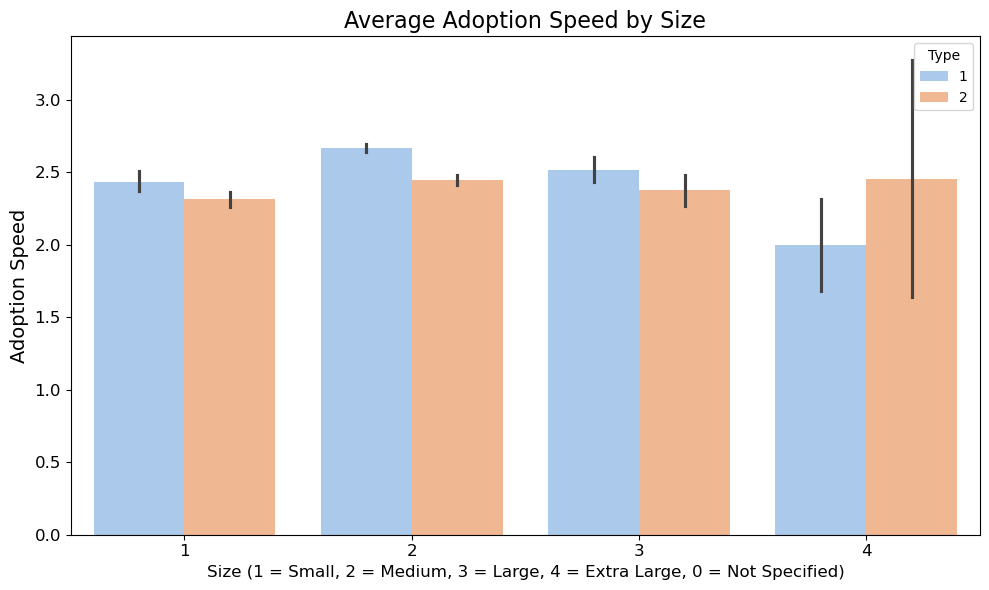

In [716]:
# Bar plot for Adoption Speed by Size
plt.figure(figsize=(10, 6))
sns.barplot(x='MaturitySize', y="AdoptionSpeed", data=train_data, hue="Type", palette='pastel', legend=True)

# Add labels and title
plt.title('Average Adoption Speed by Size', fontsize=16)
plt.xlabel('Size (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)', fontsize=12)
plt.ylabel('Adoption Speed', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

**8. Vaccinated and Adoption Speed**

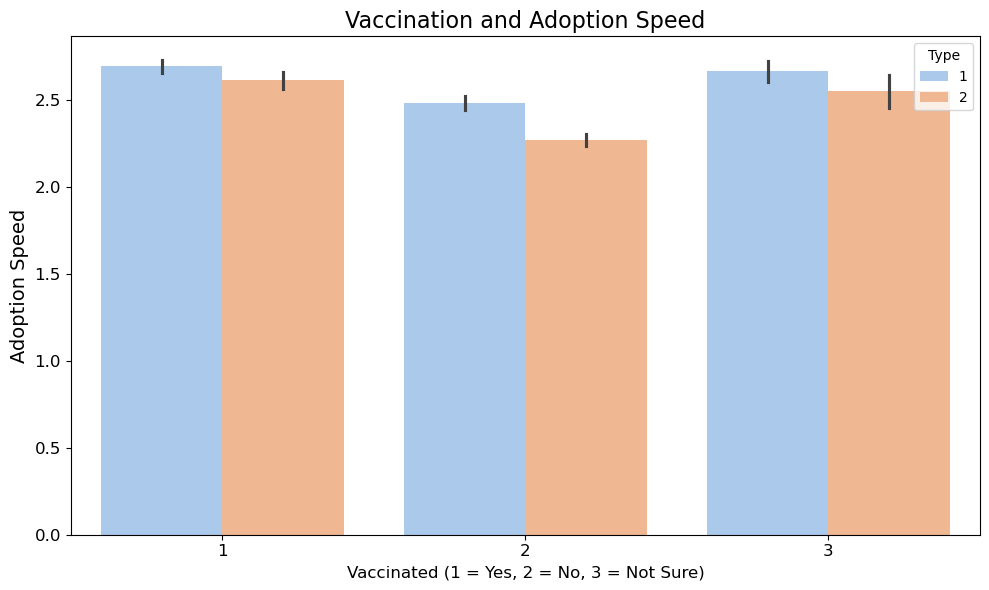

In [717]:
# Bar plot for Adoption Speed and Vaccinated
plt.figure(figsize=(10, 6))
sns.barplot(x='Vaccinated', y="AdoptionSpeed", data=train_data, hue="Type", palette='pastel', legend=True)

# Add labels and title
plt.title('Vaccination and Adoption Speed', fontsize=16)
plt.xlabel('Vaccinated (1 = Yes, 2 = No, 3 = Not Sure)', fontsize=12)
plt.ylabel('Adoption Speed', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

**9. Sterilized and Adoption Speed**

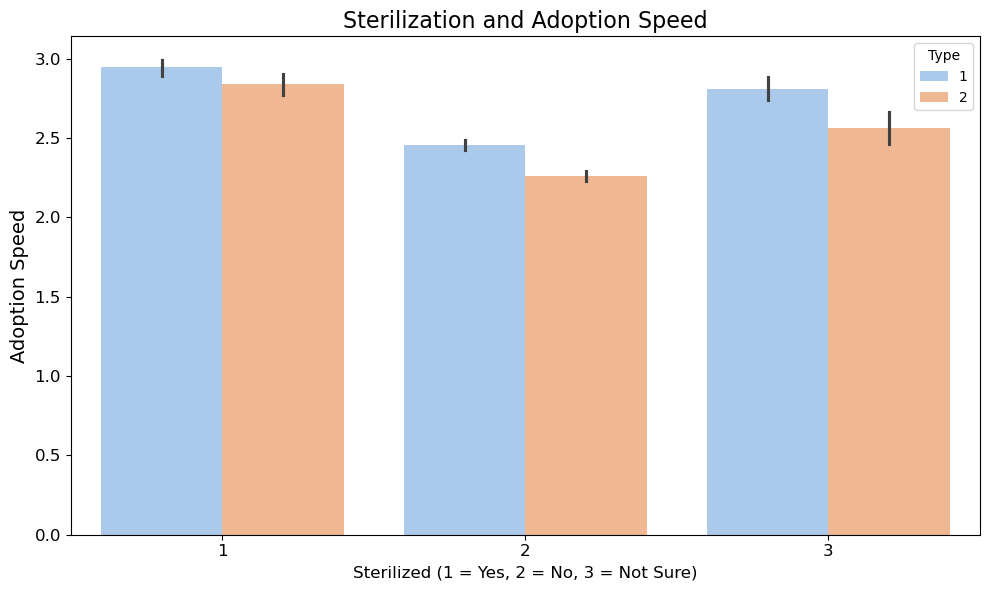

In [718]:
# Bar plot for Adoption Speed and Sterilized
plt.figure(figsize=(10, 6))
sns.barplot(x='Sterilized', y="AdoptionSpeed", data=train_data, hue="Type", palette='pastel', legend=True)

# Add labels and title
plt.title('Sterilization and Adoption Speed', fontsize=16)
plt.xlabel('Sterilized (1 = Yes, 2 = No, 3 = Not Sure)', fontsize=12)
plt.ylabel('Adoption Speed', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

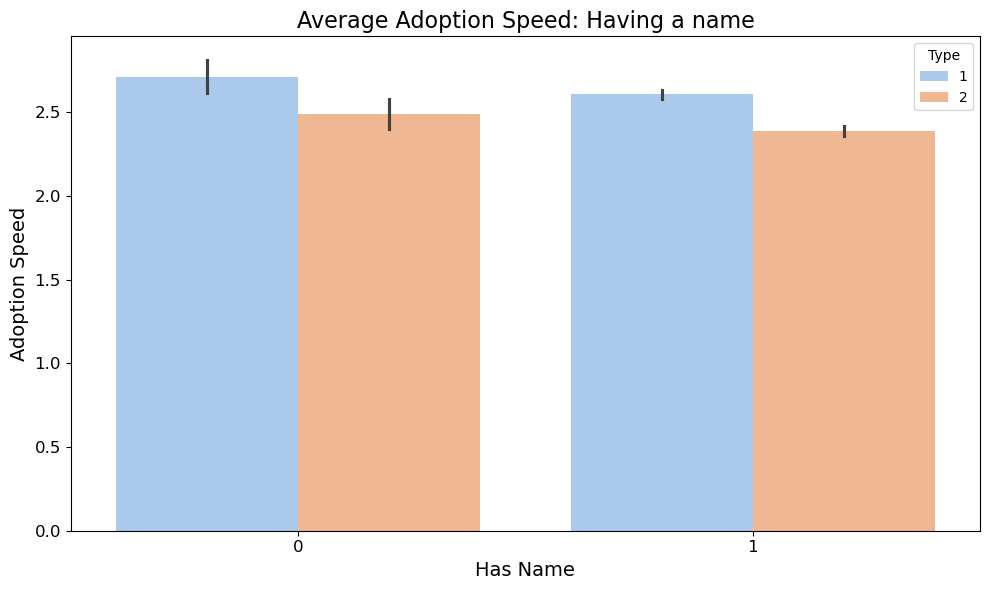

In [725]:
# We could think animals with a name get adopted faster, let's see.
# Bar plot for Adoption Speed and Has name
plt.figure(figsize=(10, 6))
sns.barplot(x='HasName', y="AdoptionSpeed", data=train_data, hue="Type", palette='pastel', legend=True)

# Add labels and title
plt.title('Average Adoption Speed: Having a name', fontsize=16)
plt.xlabel('Has Name', fontsize=14)
plt.ylabel('Adoption Speed', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

## Predictive model

Some informations to take into account to select the model:
- It's supervised learning: given labeled training to learn the relationship between the input and the outputs
- The target variable is categorical (0,1,2,3,4)
- We have a multi-class classification model


**Define X and Y**

- Target (Y) - AdoptionSpeed
- Features (X) - all the other variables of the data set

I will split my train dataset into train and test even if I have a specific test dataset in order to validate my model comparing predicted target with the actual target.

In [667]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Define X and y for the train dataset
X = train_num.drop("AdoptionSpeed", axis=1)
y = train_num["AdoptionSpeed"]

# Split in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)

# Check train and test sizes
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(14993, 22) (10495, 22) (4498, 22)
(14993,) (10495,) (4498,)


**Scale the Data**

In [668]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### 1. Logistic Regression

In [669]:
# Import Logsitic Regression
from sklearn.linear_model import LogisticRegression

# Create the Linear Regression estimator
log_model = LogisticRegression(random_state=52)

In [670]:
# Perform de fitting
log_model.fit(X_train_scaled,y_train)

# Print intercept
print("Intercept:", log_model.intercept_)

# Create a DataFrame to display feature names with their coefficients
log_coef = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': log_model.coef_[0]})

# Print the coefficients DataFrame
print(log_coef.sort_values(by="Coefficient", ascending=False))

Intercept: [-1.86866554  0.2851549   0.62636132  0.37586927  0.58128006]
         Feature  Coefficient
9      FurLength     0.230609
0           Type     0.210392
3         Breed2     0.161888
12    Sterilized     0.100486
19       HasName     0.086214
11      Dewormed     0.084354
17      VideoAmt     0.078281
5         Color1     0.063768
6         Color2     0.058500
7         Color3     0.053940
1            Age     0.015687
16         State     0.003949
13        Health    -0.013753
15           Fee    -0.038040
4         Gender    -0.047103
14      Quantity    -0.071756
10    Vaccinated    -0.084710
20   Desc_length    -0.092215
8   MaturitySize    -0.130440
21     PureBreed    -0.138565
2         Breed1    -0.171467
18      PhotoAmt    -0.212911


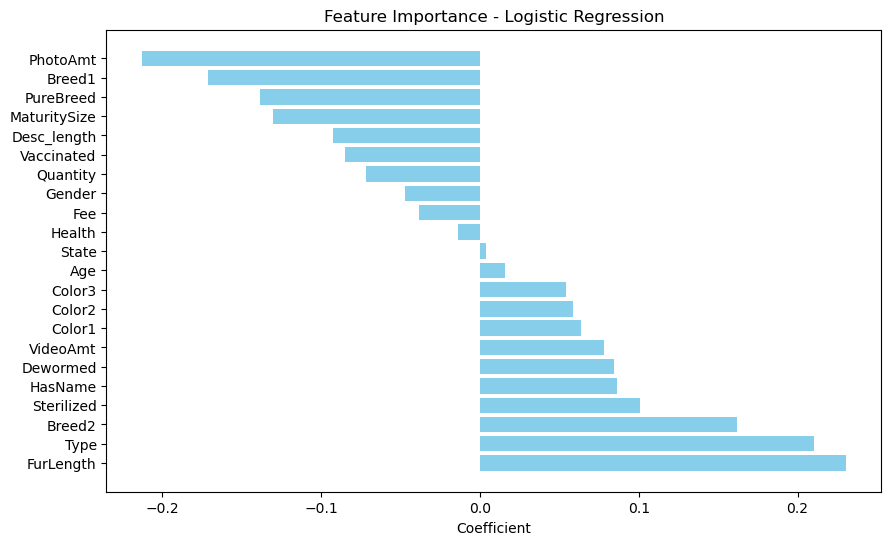

In [671]:
log_coef_sorted = log_coef.sort_values(by='Coefficient', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(log_coef_sorted['Feature'], log_coef_sorted['Coefficient'], color='skyblue')
plt.xlabel('Coefficient')
plt.title('Feature Importance - Logistic Regression')
plt.show()

**Evaluate the Logistic Regression Model**

In [672]:
# Prediction of test set
y_pred_log = log_model.predict(X_test_scaled)

#Predicted values
print(f"Prediction for test set:{y_pred_log}")

# Actual value and the predicted value
dif_pred_log = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_log})
dif_pred_log.head()


Prediction for test set:[1 2 4 ... 4 3 1]


,Actual value,Predicted value
4940,1,1
3306,1,2
8701,3,4
8489,3,2
10041,1,2


Accuracy: 35.48%
Confusion matrix:


/opt/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



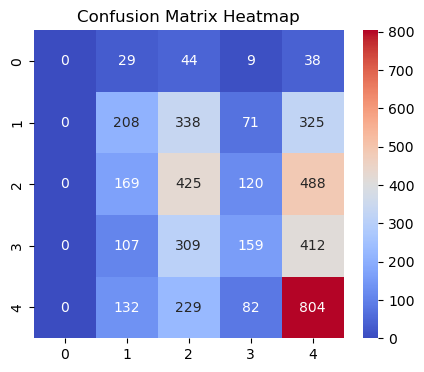

Classification report:
              precision    recall  f1-score      support
0              0.000000  0.000000  0.000000   120.000000
1              0.322481  0.220807  0.262130   942.000000
2              0.315985  0.353577  0.333726  1202.000000
3              0.360544  0.161094  0.222689   987.000000
4              0.388970  0.644747  0.485214  1247.000000
accuracy       0.354824  0.354824  0.354824     0.354824
macro avg      0.277596  0.276045  0.260752  4498.000000
weighted avg   0.338927  0.354824  0.327461  4498.000000


In [673]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
accuracy_log = accuracy_score(y_test, y_pred_log)

# Confusion metrix
cnf_matrix_log = confusion_matrix(y_test, y_pred_log)

# Classification report
class_report_log = classification_report(y_test, y_pred_log, output_dict=True)
class_report_log_df = pd.DataFrame(class_report_log).transpose()

print("Accuracy: {:.2f}%".format(accuracy_log * 100))

print("Confusion matrix:")
plt.figure(figsize=(5, 4))
sns.heatmap(cnf_matrix_log, annot=True, cmap='coolwarm', fmt=".0f")
plt.title("Confusion Matrix Heatmap")
plt.show()

print(f"Classification report:")
print(class_report_log_df)

Poor Overall Performance: The overall accuracy is 36%, with low F1-scores across most classes, especially Class 0 and Class 3. This indicates that the model struggles to generalize.

### 2. Random Forest Classifier

In [674]:
# Import Random Forest
from sklearn.ensemble import RandomForestClassifier

# Create the Linear Regression estimator
rf_model = RandomForestClassifier(random_state=52)

In [675]:
# Perform de fitting
rf_model.fit(X_train_scaled,y_train)

# Prediction of test set
y_pred_rf = rf_model.predict(X_test_scaled)

#Predicted values
print(f"Prediction for test set:{y_pred_rf}")

# Actual value and the predicted value
dif_pred_rf = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_rf})
dif_pred_rf.head()

Prediction for test set:[4 4 4 ... 2 2 1]


,Actual value,Predicted value
4940,1,4
3306,1,4
8701,3,4
8489,3,1
10041,1,1


**Evaluate the Random Forest Classifier**

Accuracy: 41.22%
Confusion matrix:


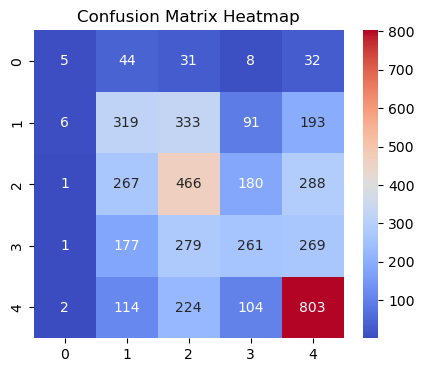

Classification report:
              precision    recall  f1-score      support
0              0.333333  0.041667  0.074074   120.000000
1              0.346363  0.338641  0.342458   942.000000
2              0.349587  0.387687  0.367653  1202.000000
3              0.405280  0.264438  0.320049   987.000000
4              0.506625  0.643945  0.567090  1247.000000
accuracy       0.412183  0.412183  0.412183     0.412183
macro avg      0.388237  0.335276  0.334265  4498.000000
weighted avg   0.404235  0.412183  0.399389  4498.000000


In [676]:
# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Confusion metrix
cnf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Classification report
class_report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
class_report_rf_df = pd.DataFrame(class_report_rf).transpose()

print("Accuracy: {:.2f}%".format(accuracy_rf * 100))

print("Confusion matrix:")
plt.figure(figsize=(5, 4))
sns.heatmap(cnf_matrix_rf, annot=True, cmap='coolwarm', fmt=".0f")
plt.title("Confusion Matrix Heatmap")
plt.show()

print(f"Classification report:")
print(class_report_rf_df)

The model performs best for class 4 with higher precision and recall but struggles significantly with minority classes like 0 and 3, leading to an overall low accuracy of 41.01%. Misclassifications are common, especially with a bias toward class 4, highlighting the need to address class imbalance and improve predictions for underrepresented classes.

### 3. LightGBM

In [677]:
!pip install lightgbm

In [678]:
# Import lightgmb
from lightgbm import LGBMClassifier

# Create the LightGBM estimator
lgbm_model = LGBMClassifier(objective='multiclass', num_class=5, random_state=52, is_unbalance=True)

In [679]:
# Perform de fitting
lgbm_model.fit(X_train_scaled,y_train)

# Prediction of test set
y_pred_lgbm = lgbm_model.predict(X_test_scaled)

#Predicted values
print(f"Prediction for test set:{y_pred_lgbm}")

# Actual value and the predicted value
dif_pred_lgbm = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_lgbm})
dif_pred_lgbm.head()

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001441 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 675
[LightGBM] [Info] Number of data points in the train set: 10495, number of used features: 22
[LightGBM] [Info] Start training from score -3.588773
[LightGBM] [Info] Start training from score -1.586362
[LightGBM] [Info] Start training from score -1.308857
[LightGBM] [Info] Start training from score -1.530238
[LightGBM] [Info] Start training from score -1.269094
Prediction for test set:[4 3 4 ... 2 2 1]


,Actual value,Predicted value
4940,1,4
3306,1,3
8701,3,4
8489,3,2
10041,1,2


**Evaluate the model**

Accuracy: 40.31%
Confusion matrix:


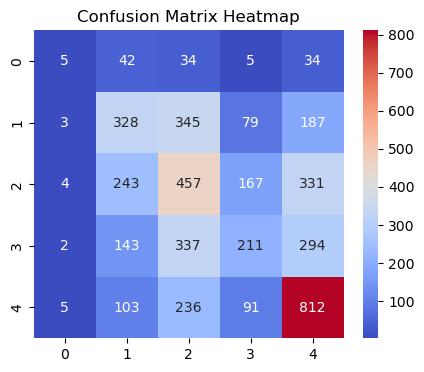

Classification report:
              precision    recall  f1-score      support
0              0.263158  0.041667  0.071942   120.000000
1              0.381839  0.348195  0.364242   942.000000
2              0.324344  0.380200  0.350057  1202.000000
3              0.381555  0.213779  0.274026   987.000000
4              0.489747  0.651163  0.559036  1247.000000
accuracy       0.403068  0.403068  0.403068     0.403068
macro avg      0.368129  0.327001  0.323861  4498.000000
weighted avg   0.393162  0.403068  0.386861  4498.000000


In [680]:
# Accuracy
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)

# Confusion metrix
cnf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)

# Classification report
class_report_lgbm = classification_report(y_test, y_pred_lgbm, output_dict=True)
class_report_lgbm_df = pd.DataFrame(class_report_lgbm).transpose()

print("Accuracy: {:.2f}%".format(accuracy_lgbm * 100))

print("Confusion matrix:")
plt.figure(figsize=(5, 4))
sns.heatmap(cnf_matrix_lgbm, annot=True, cmap='coolwarm', fmt=".0f")
plt.title("Confusion Matrix Heatmap")
plt.show()

print(f"Classification report:")
print(class_report_lgbm_df)

The LightGBM model achieved an accuracy of 40,28%, with better precision and recall for class 4 (f1-score = 0.552), but still struggles with minority classes like class 0 (f1-score = 0.04). While it improves upon previous models in balancing predictions, class imbalance remains a challenge.

**Apply targeted SMOTE oversampling for class 0 to increase its representation**

In [681]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=52)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

y_resampled.value_counts()

AdoptionSpeed
1    2950
4    2950
3    2950
2    2950
0    2950
Name: count, dtype: int64

### 4. LightGBM 2

In [682]:
# Create the LightGBM estimator
lgbm2_model = LGBMClassifier(objective='multiclass', num_class=5, random_state=52)

# Perform de fitting
lgbm2_model.fit(X_resampled,y_resampled)

# Prediction of test set
y_pred_lgbm2 = lgbm2_model.predict(X_test_scaled)

#Predicted values
print(f"Prediction for test set:{y_pred_lgbm2}")

# Actual value and the predicted value
dif_pred_lgbm2 = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_lgbm2})
dif_pred_lgbm2.head()

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4681
[LightGBM] [Info] Number of data points in the train set: 14750, number of used features: 22
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
Prediction for test set:[4 3 4 ... 2 3 2]


,Actual value,Predicted value
4940,1,4
3306,1,3
8701,3,4
8489,3,1
10041,1,1


**Evaluate the model**

Accuracy: 40.48%
Confusion matrix:


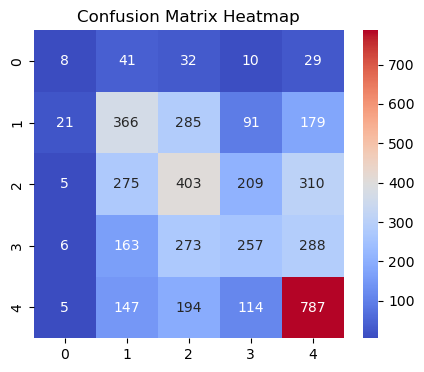

Classification report:
              precision    recall  f1-score      support
0              0.177778  0.066667  0.096970   120.000000
1              0.368952  0.388535  0.378490   942.000000
2              0.339511  0.335275  0.337380  1202.000000
3              0.377386  0.260385  0.308153   987.000000
4              0.494036  0.631115  0.554225  1247.000000
accuracy       0.404847  0.404847  0.404847     0.404847
macro avg      0.351533  0.336395  0.335044  4498.000000
weighted avg   0.392513  0.404847  0.393279  4498.000000


In [683]:
# Accuracy
accuracy_lgbm2 = accuracy_score(y_test, y_pred_lgbm2)

# Confusion metrix
cnf_matrix_lgbm2 = confusion_matrix(y_test, y_pred_lgbm2)

# Classification report
class_report_lgbm2 = classification_report(y_test, y_pred_lgbm2, output_dict=True)
class_report_lgbm2_df = pd.DataFrame(class_report_lgbm2).transpose()

print("Accuracy: {:.2f}%".format(accuracy_lgbm2 * 100))

print("Confusion matrix:")
plt.figure(figsize=(5, 4))
sns.heatmap(cnf_matrix_lgbm2, annot=True, cmap='coolwarm', fmt=".0f")
plt.title("Confusion Matrix Heatmap")
plt.show()

print(f"Classification report:")
print(class_report_lgbm2_df)

### 5. Random Forest 2

In [684]:
# Import Random Forest
from sklearn.ensemble import RandomForestClassifier

# Create the Linear Regression estimator
rf_model2 = RandomForestClassifier(random_state=52)

In [685]:
# Perform de fitting
rf_model2.fit(X_resampled,y_resampled)

# Prediction of test set
y_pred_rf2 = rf_model2.predict(X_test_scaled)

#Predicted values
print(f"Prediction for test set:{y_pred_rf2}")

# Actual value and the predicted value
dif_pred_rf2 = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_rf2})
dif_pred_rf2.head()

Prediction for test set:[2 3 4 ... 2 3 4]


,Actual value,Predicted value
4940,1,2
3306,1,3
8701,3,4
8489,3,1
10041,1,1


Accuracy: 41.22%
Confusion matrix:


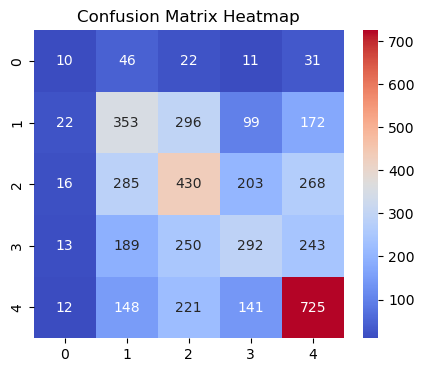

Classification report:
              precision    recall  f1-score      support
0              0.136986  0.083333  0.103627   120.000000
1              0.345739  0.374735  0.359654   942.000000
2              0.352748  0.357737  0.355225  1202.000000
3              0.391421  0.295846  0.336988   987.000000
4              0.503822  0.581395  0.539836  1247.000000
accuracy       0.402401  0.402401  0.402401     0.402401
macro avg      0.346143  0.338609  0.339066  4498.000000
weighted avg   0.395893  0.402401  0.396619  4498.000000


In [686]:
# Accuracy
accuracy_rf2 = accuracy_score(y_test, y_pred_rf2)

# Confusion metrix
cnf_matrix_rf2 = confusion_matrix(y_test, y_pred_rf2)

# Classification report
class_report_rf2 = classification_report(y_test, y_pred_rf2, output_dict=True)
class_report_rf2_df = pd.DataFrame(class_report_rf2).transpose()

print("Accuracy: {:.2f}%".format(accuracy_rf * 100))

print("Confusion matrix:")
plt.figure(figsize=(5, 4))
sns.heatmap(cnf_matrix_rf2, annot=True, cmap='coolwarm', fmt=".0f")
plt.title("Confusion Matrix Heatmap")
plt.show()

print(f"Classification report:")
print(class_report_rf2_df)

**Remove irrelevant features** - not succesful

In [687]:
print(train_data.columns)

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed',
       'HasName', 'Desc_length', 'PureBreed'],
      dtype='object')


In [688]:
train_clean = train_num.drop(["Fee", "VideoAmt", "State", "Color3", "Dewormed", "Breed2", "HasName", "PhotoAmt"], axis=1)

train_clean.head()


,Type,Age,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,Health,Quantity,AdoptionSpeed,Desc_length,PureBreed
0,2,3,299,1,1,7,1,1,2,2,1,1,2,359,0
1,2,1,265,1,1,2,2,2,3,3,1,1,0,118,0
2,1,1,307,1,2,7,2,2,1,2,1,1,3,393,0
3,1,4,307,2,1,2,2,1,1,2,1,1,2,146,0
4,1,1,307,1,1,0,2,1,2,2,1,1,2,390,0


In [689]:
# Define X and y for the train dataset
X_clean = train_clean.drop("AdoptionSpeed", axis=1)
y_clean = train_clean["AdoptionSpeed"]

# Split in train and test sets
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean, test_size=0.3, random_state=52)

# Scale
scaler = StandardScaler()
X_train_clean = scaler.fit_transform(X_train_clean)
X_test_clean = scaler.transform(X_test_clean)

# Resample
smote = SMOTE(sampling_strategy="minority", random_state=52)
X_clean, y_clean = smote.fit_resample(X_train_clean, y_train_clean)

y_clean.value_counts()

AdoptionSpeed
4    2950
0    2950
2    2835
3    2272
1    2148
Name: count, dtype: int64

In [690]:
# Create the LightGBM estimator
lgbm3_model = LGBMClassifier(objective='multiclass', num_class=5, random_state=52)

# Perform de fitting
lgbm3_model.fit(X_train_clean,y_train_clean)

# Prediction of test set
y_pred_lgbm3 = lgbm3_model.predict(X_test_clean)

#Predicted values
print(f"Prediction for test set:{y_pred_lgbm3}")

# Actual value and the predicted value
dif_pred_lgbm3 = pd.DataFrame({'Actual value': y_test_clean, 'Predicted value': y_pred_lgbm3})
dif_pred_lgbm3.head()

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001307 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 482
[LightGBM] [Info] Number of data points in the train set: 10495, number of used features: 14
[LightGBM] [Info] Start training from score -3.588773
[LightGBM] [Info] Start training from score -1.586362
[LightGBM] [Info] Start training from score -1.308857
[LightGBM] [Info] Start training from score -1.530238
[LightGBM] [Info] Start training from score -1.269094
Prediction for test set:[1 3 4 ... 2 2 1]


,Actual value,Predicted value
4940,1,1
3306,1,3
8701,3,4
8489,3,2
10041,1,2


Accuracy: 38.31%
Confusion matrix:


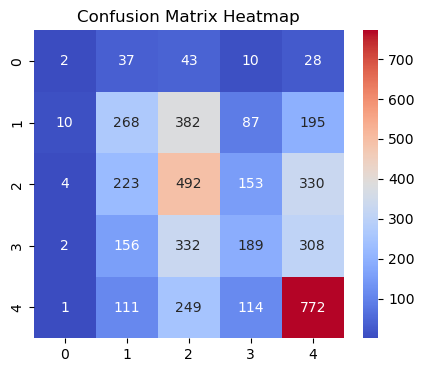

Classification report:
              precision    recall  f1-score      support
0              0.105263  0.016667  0.028777   120.000000
1              0.337107  0.284501  0.308578   942.000000
2              0.328438  0.409318  0.364444  1202.000000
3              0.341772  0.191489  0.245455   987.000000
4              0.472750  0.619086  0.536111  1247.000000
accuracy       0.383059  0.383059  0.383059     0.383059
macro avg      0.317066  0.304212  0.296673  4498.000000
weighted avg   0.367234  0.383059  0.365271  4498.000000


In [691]:
# Accuracy
accuracy_lgbm3 = accuracy_score(y_test_clean, y_pred_lgbm3)

# Confusion metrix
cnf_matrix_lgbm3 = confusion_matrix(y_test_clean, y_pred_lgbm3)

# Classification report
class_report_lgbm3 = classification_report(y_test, y_pred_lgbm3, output_dict=True)
class_report_lgbm3_df = pd.DataFrame(class_report_lgbm3).transpose()

print("Accuracy: {:.2f}%".format(accuracy_lgbm3 * 100))

print("Confusion matrix:")
plt.figure(figsize=(5, 4))
sns.heatmap(cnf_matrix_lgbm3, annot=True, cmap='coolwarm', fmt=".0f")
plt.title("Confusion Matrix Heatmap")
plt.show()

print(f"Classification report:")
print(class_report_lgbm3_df)

## Compare Results

In [719]:
# List of the models
names = ['Logistic Regression' , 'Random Forest', 
         'Light GBM','Random Forest with SMOTE', 'Light GBM with SMOTE']

models = [log_model , rf_model, lgbm_model, rf_model2, lgbm2_model]

# Variables to take into account: accuracy, confusion matrix, classification report
acc = [accuracy_log, accuracy_rf, accuracy_lgbm, accuracy_rf2, accuracy_lgbm2]
conf_matrix = [cnf_matrix_rf, cnf_matrix_lgbm, cnf_matrix_rf2, cnf_matrix_lgbm2]
report = [class_report_log, class_report_rf, class_report_lgbm, class_report_rf2, class_report_lgbm2]

In [693]:
import plotly.express as px
# Accuracy comparison
comparison_acc = pd.DataFrame({'Models': names, 'Accuracy': acc})

# Create a horizontal bar plot with annotations
fig = px.bar(comparison_acc, x='Accuracy', y='Models', orientation='h',
             text='Accuracy',  # Automatically add annotations
             color='Models',   # Color each bar differently
             color_discrete_sequence=['salmon', 'skyblue', 'lightgreen', 'khaki'])

fig.show()

Text(0.5, 0.98, 'Confusion Matrix Comparison')

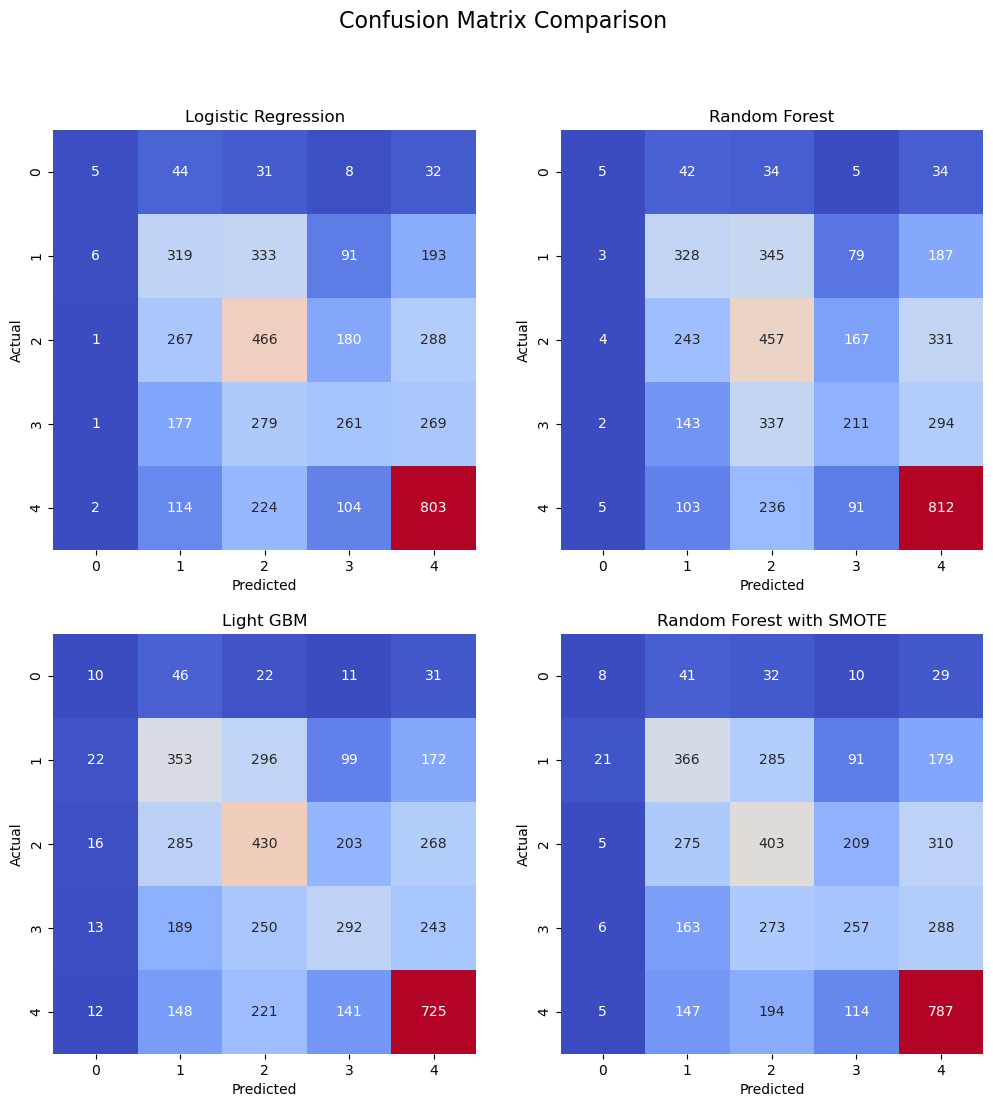

In [723]:
# Confusion matrix comparison
titles = names

# Create a figure with a grid of subplots
plt.figure(figsize=(12, 12))

# Loop through each confusion matrix and plot it as a subplot
for i, matrix in enumerate(conf_matrix):
    plt.subplot(2, 2, i + 1)  # 2x2 grid
    sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt=".0f", cbar=False)
    plt.title(titles[i])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.suptitle("Confusion Matrix Comparison", fontsize=16)

/opt/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



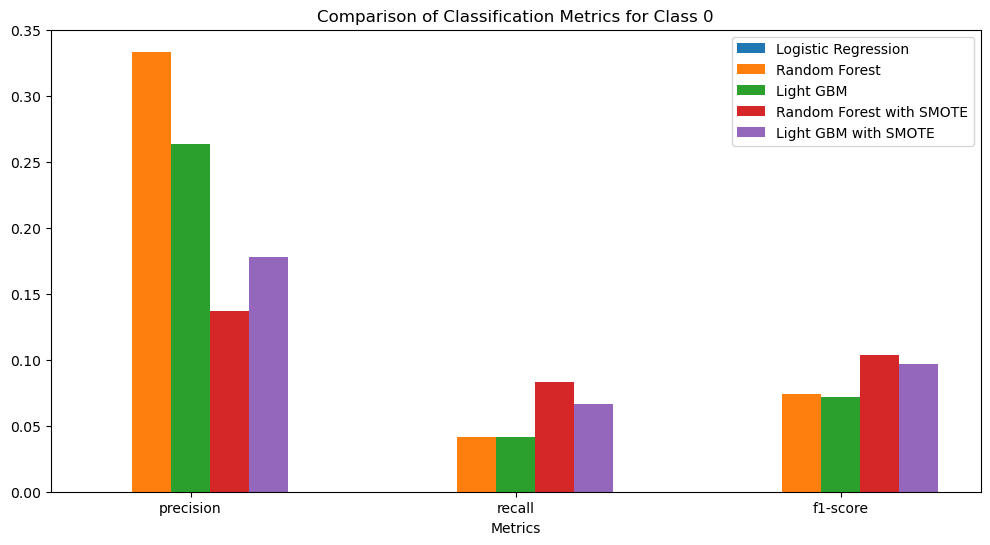

In [724]:
# List of predicted values (y_pred) for each model
y_preds = [y_pred_log, y_pred_rf, y_pred_lgbm, y_pred_rf2, y_pred_lgbm2]

# Convert classification reports to dictionaries
report_dicts = [classification_report(y_test, y_pred, output_dict=True) for y_pred in y_preds]

# Extract metrics for plotting
metrics = ['precision', 'recall', 'f1-score']

# Prepare data for bar chart (values for each metric across models)
metric_values = {name: [report_dict['0'][metric] for metric in metrics] for name, report_dict in zip(names, report_dicts)}

# Prepare values for plotting
logistic_values = metric_values['Logistic Regression']
rf_values = metric_values['Random Forest']
lgbm_values = metric_values['Light GBM']
rf2_values = metric_values['Random Forest with SMOTE']
lgbm2_values = metric_values['Light GBM with SMOTE']

# X locations for groups
x = np.arange(len(metrics))  

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.12  # width of the bars
ax.bar(x - 2*width, logistic_values, width, label='Logistic Regression')
ax.bar(x - width, rf_values, width, label='Random Forest')
ax.bar(x, lgbm_values, width, label='Light GBM')
ax.bar(x + width, rf2_values, width, label='Random Forest with SMOTE')
ax.bar(x + 2*width, lgbm2_values, width, label='Light GBM with SMOTE')

# Labeling
ax.set_xlabel('Metrics')
ax.set_title('Comparison of Classification Metrics for Class 0')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()




/opt/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



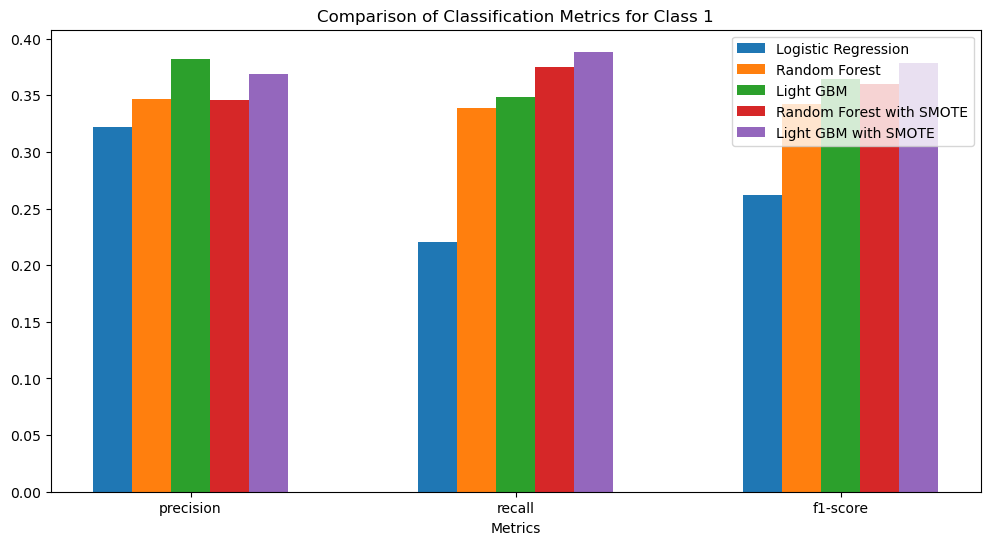

In [703]:
# List of predicted values (y_pred) for each model
y_preds = [y_pred_log, y_pred_rf, y_pred_lgbm, y_pred_rf2, y_pred_lgbm2]

# Convert classification reports to dictionaries
report_dicts = [classification_report(y_test, y_pred, output_dict=True) for y_pred in y_preds]

# Extract metrics for plotting
metrics = ['precision', 'recall', 'f1-score']

# Prepare data for bar chart (values for each metric across models)
metric_values = {name: [report_dict['1'][metric] for metric in metrics] for name, report_dict in zip(names, report_dicts)}

# Prepare values for plotting
logistic_values = metric_values['Logistic Regression']
rf_values = metric_values['Random Forest']
lgbm_values = metric_values['Light GBM']
rf2_values = metric_values['Random Forest with SMOTE']
lgbm2_values = metric_values['Light GBM with SMOTE']

# X locations for groups
x = np.arange(len(metrics))  

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.12  # width of the bars
ax.bar(x - 2*width, logistic_values, width, label='Logistic Regression')
ax.bar(x - width, rf_values, width, label='Random Forest')
ax.bar(x, lgbm_values, width, label='Light GBM')
ax.bar(x + width, rf2_values, width, label='Random Forest with SMOTE')
ax.bar(x + 2*width, lgbm2_values, width, label='Light GBM with SMOTE')

# Labeling
ax.set_xlabel('Metrics')
ax.set_title('Comparison of Classification Metrics for Class 1')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()

/opt/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



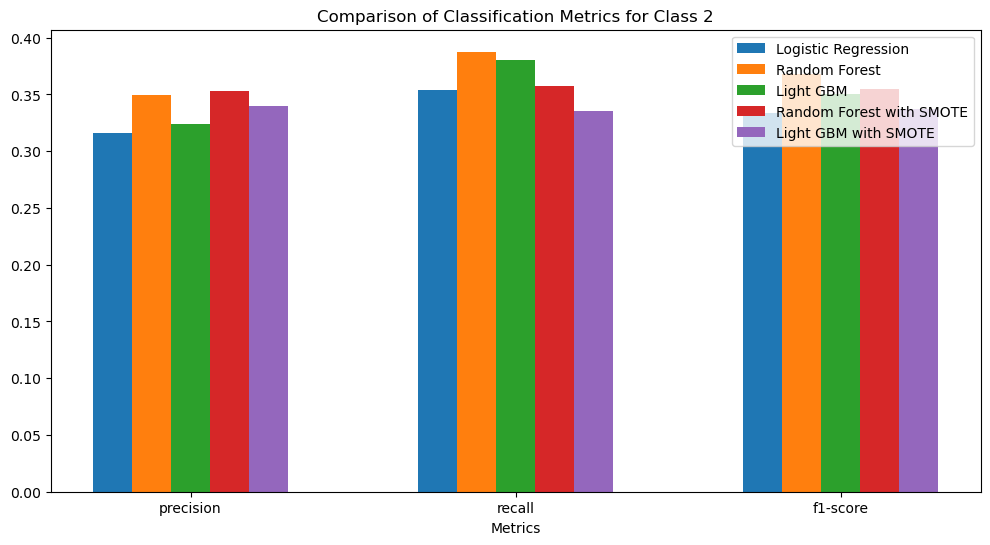

In [704]:
# List of predicted values (y_pred) for each model
y_preds = [y_pred_log, y_pred_rf, y_pred_lgbm, y_pred_rf2, y_pred_lgbm2]

# Convert classification reports to dictionaries
report_dicts = [classification_report(y_test, y_pred, output_dict=True) for y_pred in y_preds]

# Extract metrics for plotting
metrics = ['precision', 'recall', 'f1-score']

# Prepare data for bar chart (values for each metric across models)
metric_values = {name: [report_dict['2'][metric] for metric in metrics] for name, report_dict in zip(names, report_dicts)}

# Prepare values for plotting
logistic_values = metric_values['Logistic Regression']
rf_values = metric_values['Random Forest']
lgbm_values = metric_values['Light GBM']
rf2_values = metric_values['Random Forest with SMOTE']
lgbm2_values = metric_values['Light GBM with SMOTE']

# X locations for groups
x = np.arange(len(metrics))  

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.12  # width of the bars
ax.bar(x - 2*width, logistic_values, width, label='Logistic Regression')
ax.bar(x - width, rf_values, width, label='Random Forest')
ax.bar(x, lgbm_values, width, label='Light GBM')
ax.bar(x + width, rf2_values, width, label='Random Forest with SMOTE')
ax.bar(x + 2*width, lgbm2_values, width, label='Light GBM with SMOTE')

# Labeling
ax.set_xlabel('Metrics')
ax.set_title('Comparison of Classification Metrics for Class 2')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()

/opt/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



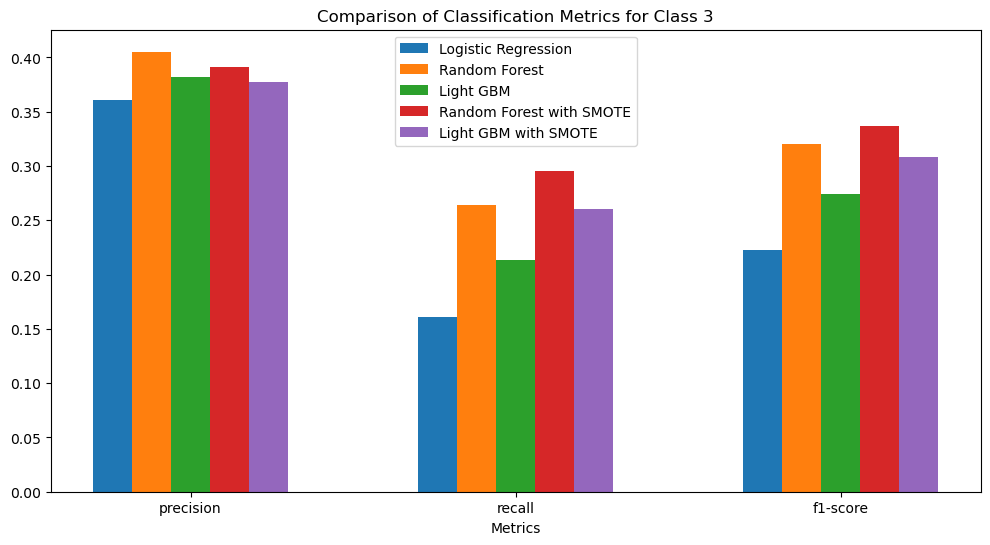

In [705]:
# List of predicted values (y_pred) for each model
y_preds = [y_pred_log, y_pred_rf, y_pred_lgbm, y_pred_rf2, y_pred_lgbm2]

# Convert classification reports to dictionaries
report_dicts = [classification_report(y_test, y_pred, output_dict=True) for y_pred in y_preds]

# Extract metrics for plotting
metrics = ['precision', 'recall', 'f1-score']

# Prepare data for bar chart (values for each metric across models)
metric_values = {name: [report_dict['3'][metric] for metric in metrics] for name, report_dict in zip(names, report_dicts)}

# Prepare values for plotting
logistic_values = metric_values['Logistic Regression']
rf_values = metric_values['Random Forest']
lgbm_values = metric_values['Light GBM']
rf2_values = metric_values['Random Forest with SMOTE']
lgbm2_values = metric_values['Light GBM with SMOTE']

# X locations for groups
x = np.arange(len(metrics))  

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.12  # width of the bars
ax.bar(x - 2*width, logistic_values, width, label='Logistic Regression')
ax.bar(x - width, rf_values, width, label='Random Forest')
ax.bar(x, lgbm_values, width, label='Light GBM')
ax.bar(x + width, rf2_values, width, label='Random Forest with SMOTE')
ax.bar(x + 2*width, lgbm2_values, width, label='Light GBM with SMOTE')

# Labeling
ax.set_xlabel('Metrics')
ax.set_title('Comparison of Classification Metrics for Class 3')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()

/opt/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



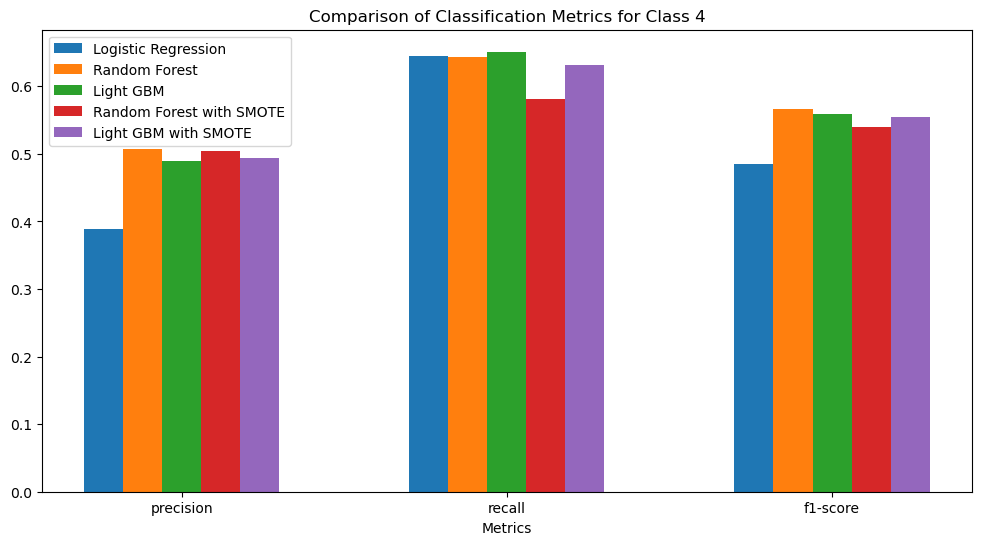

In [706]:
# List of predicted values (y_pred) for each model
y_preds = [y_pred_log, y_pred_rf, y_pred_lgbm, y_pred_rf2, y_pred_lgbm2]

# Convert classification reports to dictionaries
report_dicts = [classification_report(y_test, y_pred, output_dict=True) for y_pred in y_preds]

# Extract metrics for plotting
metrics = ['precision', 'recall', 'f1-score']

# Prepare data for bar chart (values for each metric across models)
metric_values = {name: [report_dict['4'][metric] for metric in metrics] for name, report_dict in zip(names, report_dicts)}

# Prepare values for plotting
logistic_values = metric_values['Logistic Regression']
rf_values = metric_values['Random Forest']
lgbm_values = metric_values['Light GBM']
rf2_values = metric_values['Random Forest with SMOTE']
lgbm2_values = metric_values['Light GBM with SMOTE']

# X locations for groups
x = np.arange(len(metrics))  

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.12  # width of the bars
ax.bar(x - 2*width, logistic_values, width, label='Logistic Regression')
ax.bar(x - width, rf_values, width, label='Random Forest')
ax.bar(x, lgbm_values, width, label='Light GBM')
ax.bar(x + width, rf2_values, width, label='Random Forest with SMOTE')
ax.bar(x + 2*width, lgbm2_values, width, label='Light GBM with SMOTE')

# Labeling
ax.set_xlabel('Metrics')
ax.set_title('Comparison of Classification Metrics for Class 4')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()

/opt/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



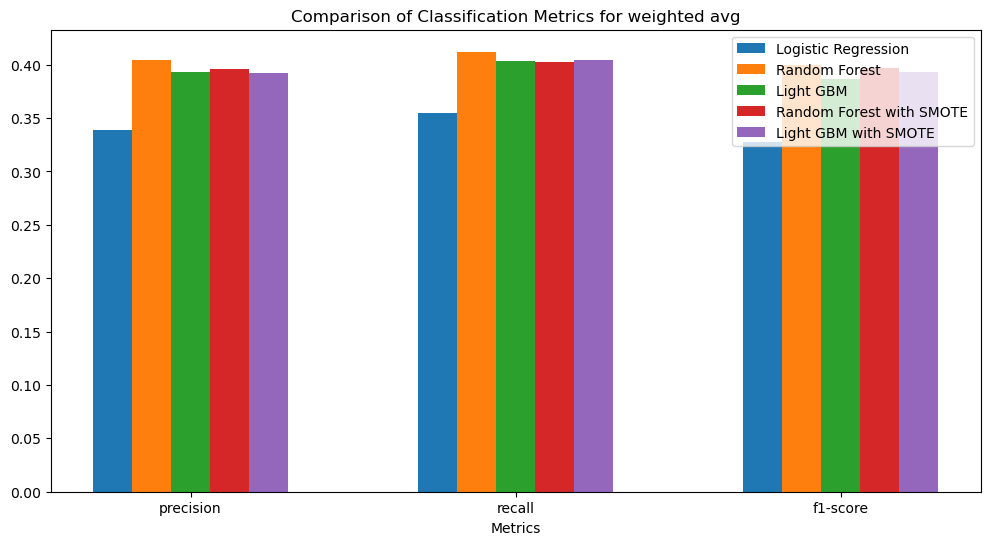

In [707]:
# List of predicted values (y_pred) for each model
y_preds = [y_pred_log, y_pred_rf, y_pred_lgbm, y_pred_rf2, y_pred_lgbm2]

# Convert classification reports to dictionaries
report_dicts = [classification_report(y_test, y_pred, output_dict=True) for y_pred in y_preds]

# Extract metrics for plotting
metrics = ['precision', 'recall', 'f1-score']

# Prepare data for bar chart (values for each metric across models)
metric_values = {name: [report_dict['weighted avg'][metric] for metric in metrics] for name, report_dict in zip(names, report_dicts)}

# Prepare values for plotting
logistic_values = metric_values['Logistic Regression']
rf_values = metric_values['Random Forest']
lgbm_values = metric_values['Light GBM']
rf2_values = metric_values['Random Forest with SMOTE']
lgbm2_values = metric_values['Light GBM with SMOTE']

# X locations for groups
x = np.arange(len(metrics))  

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.12  # width of the bars
ax.bar(x - 2*width, logistic_values, width, label='Logistic Regression')
ax.bar(x - width, rf_values, width, label='Random Forest')
ax.bar(x, lgbm_values, width, label='Light GBM')
ax.bar(x + width, rf2_values, width, label='Random Forest with SMOTE')
ax.bar(x + 2*width, lgbm2_values, width, label='Light GBM with SMOTE')

# Labeling
ax.set_xlabel('Metrics')
ax.set_title('Comparison of Classification Metrics for weighted avg')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()

In [ ]:
train_clean = train_num.drop(["Fee", "VideoAmt", "State", "Color3", "Dewormed", "Breed2", "HasName", "PhotoAmt"], axis=1)

train_clean.head()


,Type,Age,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,Health,Quantity,AdoptionSpeed,Desc_length,PureBreed
0,2,3,299,1,1,7,1,1,2,2,1,1,2,359,0
1,2,1,265,1,1,2,2,2,3,3,1,1,0,118,0
2,1,1,307,1,2,7,2,2,1,2,1,1,3,393,0
3,1,4,307,2,1,2,2,1,1,2,1,1,2,146,0
4,1,1,307,1,1,0,2,1,2,2,1,1,2,390,0
